# Prévisions météorologiques en Australie

# Exploration des données

## Récupération des librairies

In [1]:
# récupération du package imblearn
!pip install --upgrade imblearn

In [2]:
# récupération du package geopandas
!pip install --upgrade pipwin
!pipwin install gdal
!pipwin install fiona
!pip install --upgrade geopandas

Package `gdal` found in cache
https://download.lfd.uci.edu/pythonlibs/archived/GDAL-3.4.3-cp39-cp39-win_amd64.whl
GDAL-3.4.3-cp39-cp39-win_amd64.whl
[*] 0 bytes / 24.6 MB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 0 bytes / 24.6 MB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 0 bytes / 24.6 MB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 0 bytes / 24.6 MB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 0 bytes / 24.6 MB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 0 bytes / 24.6 MB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 0 bytes / 24.6 MB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 0 bytes / 24.6 MB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 40 kB / 24.6 MB @ 44 kB/s [------------------] [0.2%, 0s left]  [*] 168 kB / 24.6 MB @ 168 kB/s [------------------] [0.7%, 0s left]  [*] 200 kB / 24.6 MB @ 182 kB/s [------------------] [0.8%, 0s left]  [*] 600 kB / 24.6 MB @ 500 kB/s [------------------] [2.4%, 0s left

In [3]:
# récupération des librairies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from imblearn.under_sampling import RandomUnderSampler

## Récupération des données

In [4]:
# récupération du jeu de données
df = pd.read_csv('../data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Informations générales 

In [5]:
# informations générales sur le dataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

- Le jeu de données comporte deux types de données: "float64" et "object". 
- Les variables "Date" et "Location" n'ont pas de valeurs manquantes, à la différence des autres variables.
- Les variables "Cloud3pm" et "Cloud9pm" sont celles qui présentent le plus de valeurs manquantes.

In [6]:
# taille du DataFrame
print("Nombre d'observations : {} \n Nombre de variables : {}".format(df.shape[0], df.shape[1]))

Nombre d'observations : 145460 
 Nombre de variables : 23


In [7]:
# affichage des colonnes du DataFrame
df.columns.to_list()

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

## Distribution de la variable cible

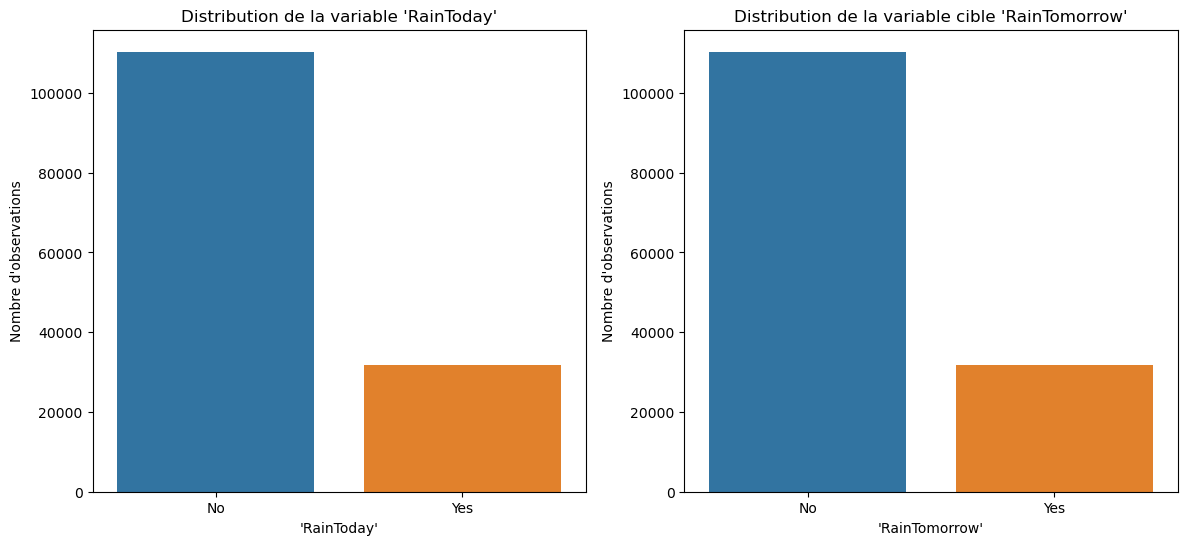

In [8]:
# distribution de la variable 'RainToday'
plt.figure(figsize=(14,6))
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='RainToday', data=df)
ax1 = plt.title("Distribution de la variable 'RainToday'", fontsize=12)
ax1 = plt.xlabel("'RainToday'")
ax1 = plt.ylabel("Nombre d'observations")

# distribution de la variable cible 'RainTomorrow'
ax2 = plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='RainTomorrow', data=df)
ax2 = plt.title("Distribution de la variable cible 'RainTomorrow'", fontsize=12)
ax2 = plt.xlabel("'RainTomorrow'")
ax2 = plt.ylabel("Nombre d'observations")

In [9]:
# détails sur la distribution de la variable 'RainToday'
print("Distribution de la variable 'RainToday': \n", df['RainToday'].value_counts(normalize=True))

Distribution de la variable 'RainToday': 
 No     0.775807
Yes    0.224193
Name: RainToday, dtype: float64


In [10]:
# détails sur la distribution de la variable cible 'RainTomorrow'
print("Distribution de la variable cible 'RainTomorrow': \n", df['RainTomorrow'].value_counts(normalize=True))

Distribution de la variable cible 'RainTomorrow': 
 No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64


- Les variables **"RainToday"** et **"RainTomorrow"** présentent une forte disparité entre leurs classes, avec :
  - **22.4%** des observations qui correspondent à la classe minoritaire **"Yes"**,
  - **77.6%** des observations qui correspondent à la classe majoritaire **"No"**.
- Il s'agit d'un problème de classification binaire sur jeu de données déséquilibré.
- Il est possible que ces deux variables soient fortement corrélées.

In [11]:
# table de contingence entre deux variables qualitatives
table = pd.crosstab(df['RainToday'], df['RainTomorrow'])
table

RainTomorrow,No,Yes
RainToday,,
No,92728,16604
Yes,16858,14597


In [12]:
# test de chi2 (test de proportions)
resultats_test = chi2_contingency(table)

statistique = resultats_test[0]
p_value = resultats_test[1]
degre_liberte = resultats_test[2]

print("Test de chi2 entre les variables 'RainToday' et 'RainTomorrow':")
print("\n statistique: {} \n p_value: {} \n degre_liberte: {}".format(statistique, p_value, degre_liberte))

Test de chi2 entre les variables 'RainToday' et 'RainTomorrow':

 statistique: 13799.479649324368 
 p_value: 0.0 
 degre_liberte: 1


In [13]:
# mesure du niveau de corrélation entre deux variables qualitatives par le V de Cramer
def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0, (stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1, r_corr - 1))

print("V_Cramer = {}".format(V_Cramer(table, df.shape[0])))

V_Cramer = 0.3079961727173337


- La p_value est nulle et le V_Cramer n'est pas proche de 1, donc <u>les variables 'RainToday' et 'RainTomorrow' ne sont pas très corrélées</u>.

## Etude statistique descriptive rapide

### Variables qualitatives

In [14]:
# récupération des variables qualitatives
cat_features = [col for col in df.columns if df[col].dtype == 'O']
cat_data = df.select_dtypes(include = 'O')

print("Variables qualitatives: ", cat_features,'\n')
print("Nombre de variables qualitatives: ", len(cat_features))

Variables qualitatives:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 

Nombre de variables qualitatives:  7


In [15]:
# cardinalité
for feature in cat_features:
    print("Cardinalité de '{}': {}".format(feature, len(df[feature].unique())))

Cardinalité de 'Date': 3436
Cardinalité de 'Location': 49
Cardinalité de 'WindGustDir': 17
Cardinalité de 'WindDir9am': 17
Cardinalité de 'WindDir3pm': 17
Cardinalité de 'RainToday': 3
Cardinalité de 'RainTomorrow': 3


- La variable **"Date"** présente un nombre très élevé de modalités qui ne recouvre pas entièrement une période de 10 ans. Certains jours manquent donc de données. Il est absolument nécessaire de modifier cette variable pour réduire sa cardinalité. 
- Les variables **"Location"**, **"WindGustDir"**, **"WindDir9am"** et **"WindDir3pm"** présentent un nombre important de modalités.
- Les variables **"RainToday"** et **"RainTomorrow"** ne contiennent que deux modalités qui seront encodées en données binaires.
- Les variable qualitatives présentant une forte cardinalité posent problème car la taille de la matrice de données augmente significativement lorsque ces variable sont encodées. Concernant la variable **"Location"**, il est ainsi possible soit de l'ignorer, soit de regrouper les villes par différents secteurs de l'Australie et ainsi réduire son nombre de classes distinctes.

In [16]:
# étude statistique descriptive rapide
df.describe(include=[object])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [17]:
# récupération de l'élément le plus fréquent pour chaque variable qualitative
for feature in cat_features:
    print("Mode de '{}': {}".format(feature, df[feature].value_counts().idxmax()))

Mode de 'Date': 2013-11-12
Mode de 'Location': Canberra
Mode de 'WindGustDir': W
Mode de 'WindDir9am': N
Mode de 'WindDir3pm': SE
Mode de 'RainToday': No
Mode de 'RainTomorrow': No


In [18]:
# conversion de la variable 'Date' au format datetime
df['Date'] = pd.to_datetime(df['Date'])

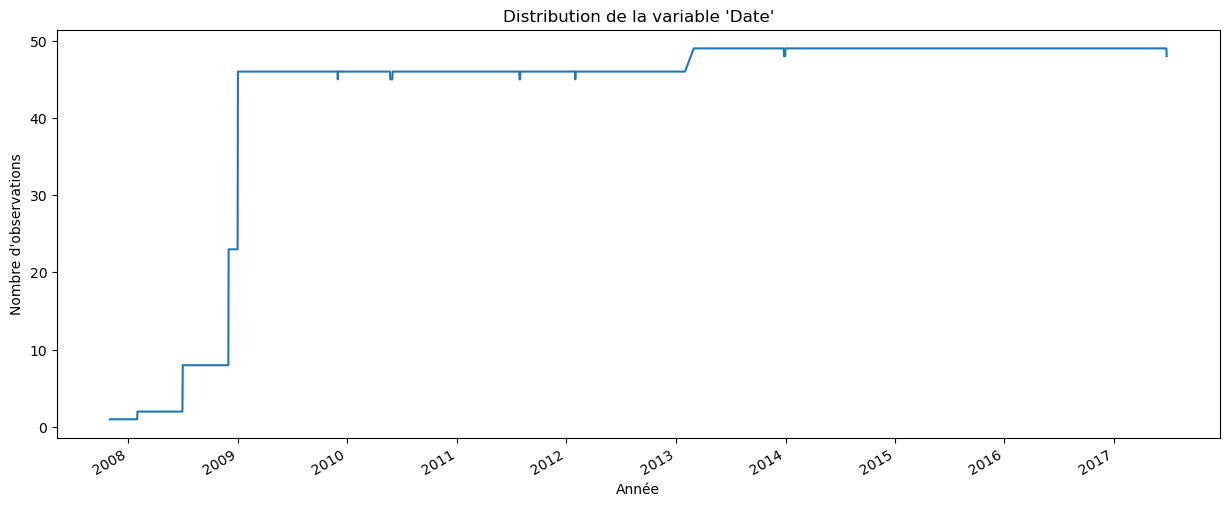

In [19]:
# distribution de la variable 'Date'
plt.figure(figsize=(15,6))
df.groupby(['Date']).size().plot()
plt.title("Distribution de la variable 'Date'", fontsize=12)
plt.xlabel("Année")
plt.ylabel("Nombre d'observations");

- la distribution de la variable **"Date"** n'est pas uniforme, avec des valeurs variant d'une seule à près de 50 observations par jour.

In [20]:
# la variable 'Date' est convertie en 3 nouvelles variables: 'year', 'month' et 'day'
df['year'] = pd.to_datetime(df['Date']).dt.year
df['month'] = pd.to_datetime(df['Date']).dt.month
df['day'] = pd.to_datetime(df['Date']).dt.day

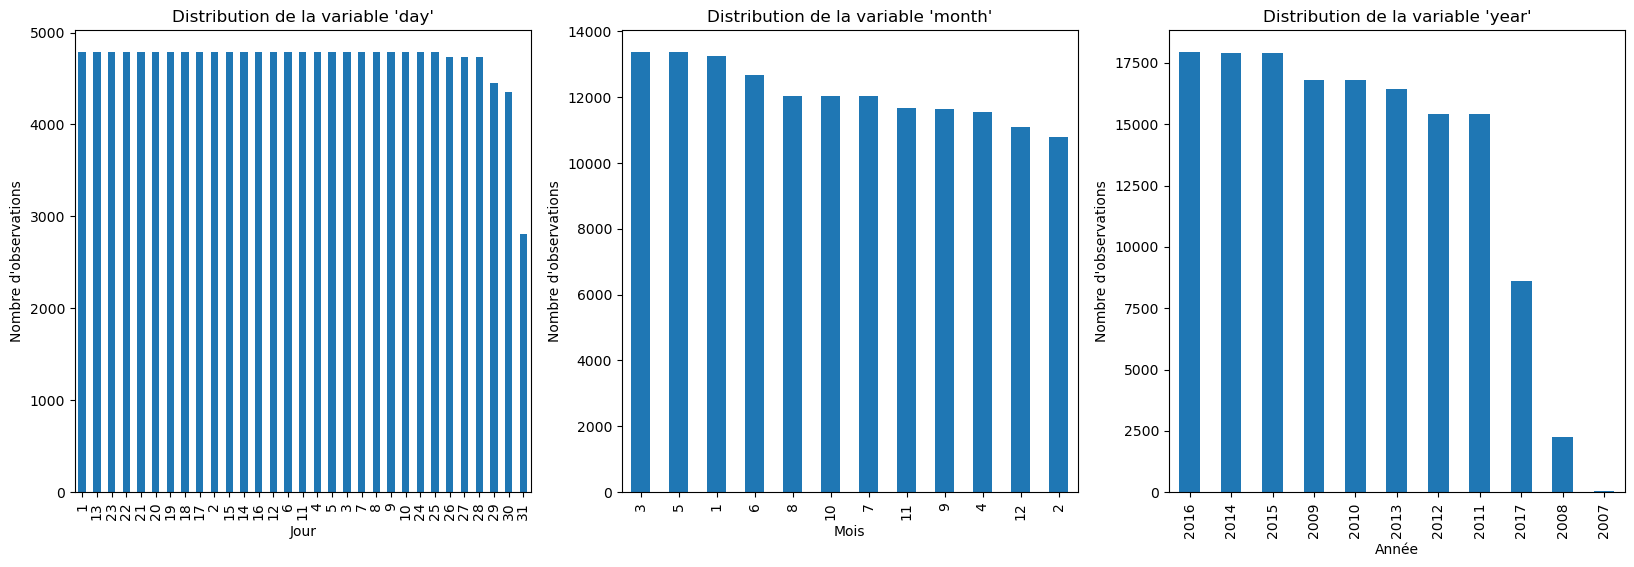

In [21]:
# distribution de la variable 'day' 
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1, 3, 1)
ax1 = df['day'].value_counts().plot(kind='bar')
ax1 = plt.title("Distribution de la variable 'day'", fontsize=12)
ax1 = plt.xlabel("Jour")
ax1 = plt.ylabel("Nombre d'observations")

# distribution de la variable 'month' 
ax2 = plt.subplot(1, 3, 2)
ax2 = df['month'].value_counts().plot(kind='bar')
ax2 = plt.title("Distribution de la variable 'month'", fontsize=12)
ax2 = plt.xlabel("Mois")
ax2 = plt.ylabel("Nombre d'observations")

# distribution de la variable 'year' 
ax3 = plt.subplot(1, 3, 3)
ax3 = df['year'].value_counts().plot(kind='bar')
ax3 = plt.title("Distribution de la variable 'year'", fontsize=12)
ax3 = plt.xlabel("Année")
ax3 = plt.ylabel("Nombre d'observations");

- Les derniers jours du mois possèdent moins d'observations, ce qui est cohérent sur une période de 10 années.
- Les observations sont inégalement réparties sur les mois de l'année.
- L' année 2007 ne possède quasiment pas d'observations.
- les années 2008 et 2017 possèdent beaucoup moins d'observations que les autres années.

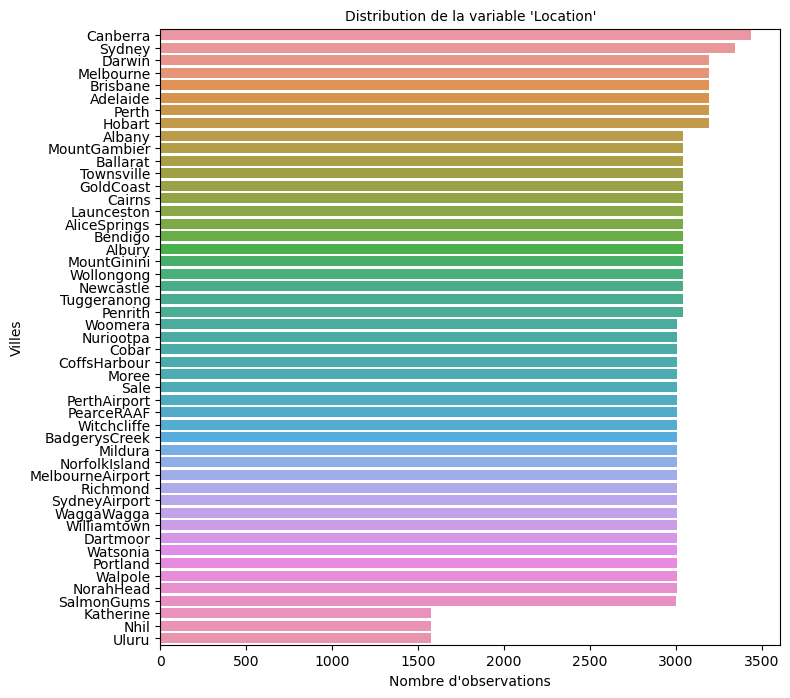

In [22]:
# distribution de la variable 'Location'
plt.figure(figsize=(8,8))
sns.countplot(y=df['Location'], order=df['Location'].value_counts().index)
plt.title("Distribution de la variable 'Location'", fontsize=10)
plt.ylabel('Villes')
plt.xlabel("Nombre d'observations");

- Les observations sont inégalement réparties selon les villes où se situe la station météorologique.
- La majorité des villes possèdent entre 3000 et 3500 observations. 

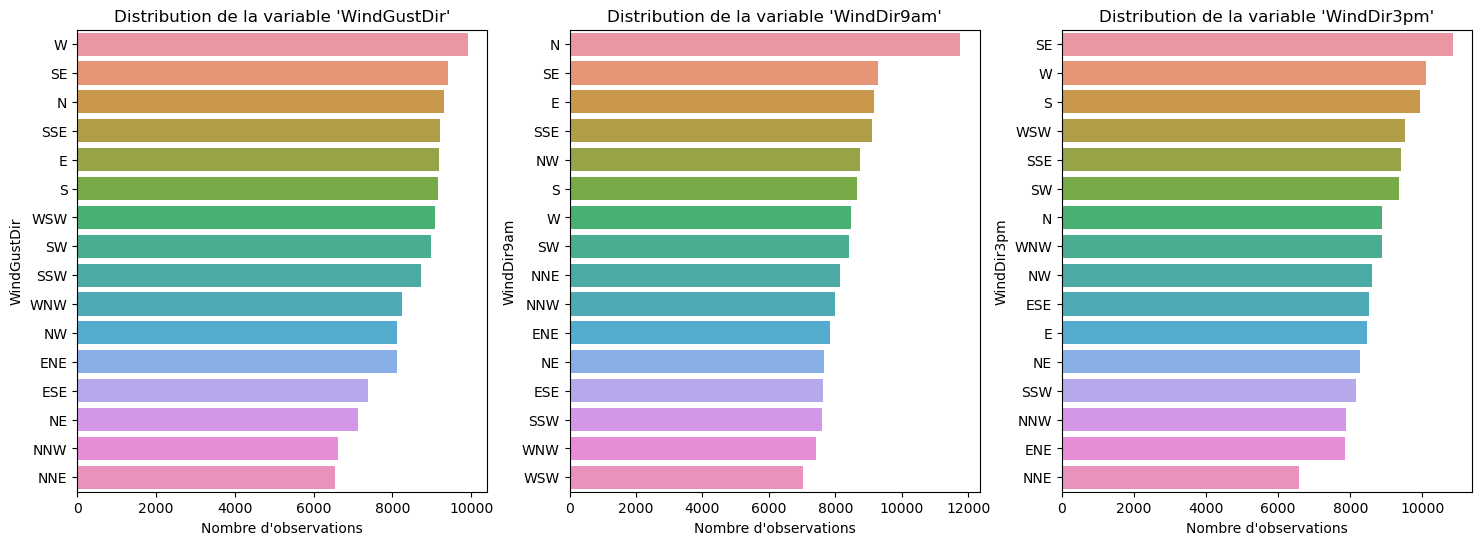

In [23]:
# distribution des variables 'WindGustDir', 'WindDir9am' et 'WindDir3pm'
plt.figure(figsize=(18,6))

ax1 = plt.subplot(1, 3, 1)
ax1 = sns.countplot(y=df['WindGustDir'], order=df['WindGustDir'].value_counts().index)
ax1 = plt.title("Distribution de la variable 'WindGustDir'", fontsize=12)
ax1 = plt.xlabel("Nombre d'observations")

ax2 = plt.subplot(1, 3, 2)
ax2 = sns.countplot(y=df['WindDir9am'], order=df['WindDir9am'].value_counts().index)
ax2 = plt.title("Distribution de la variable 'WindDir9am'", fontsize=12)
ax2 = plt.xlabel("Nombre d'observations")

ax3 = plt.subplot(1, 3, 3)
ax3 = sns.countplot(y=df['WindDir3pm'], order=df['WindDir3pm'].value_counts().index)
ax3 = plt.title("Distribution de la variable 'WindDir3pm'", fontsize=12)
ax3 = plt.xlabel("Nombre d'observations");

- Les variables "WindGustDir", "WindDir9am" et "WindDir3pm" présentent une distribution des observations assez uniforme entre les différentes classes.

In [24]:
# suppression des colonnes non considérées
df.drop(['Date', 'day'], axis=1, inplace = True)

- On ne garde que les observations relatives au mois et à l'année.

In [25]:
# mise à jour de la liste des colonnes du DataFrame
cat_features = [col for col in df.columns if df[col].dtype == 'O']

### Variables quantitatives

In [26]:
# récupération des variables quantitatives
num_features = [col for col in df.columns if df[col].dtype != 'O']
num_data = df.select_dtypes(include='number')

print("Variables quantitatives: {}".format(num_features),'\n')
print("Nombre de variables quantitatives: {}".format(len(num_features)))

Variables quantitatives: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month'] 

Nombre de variables quantitatives: 18


In [27]:
# cardinalité
for feature in num_features:
    unique_values = len(df[feature].unique())
    print("Cardinalité de '{}': {}".format(feature, unique_values))

Cardinalité de 'MinTemp': 390
Cardinalité de 'MaxTemp': 506
Cardinalité de 'Rainfall': 682
Cardinalité de 'Evaporation': 359
Cardinalité de 'Sunshine': 146
Cardinalité de 'WindGustSpeed': 68
Cardinalité de 'WindSpeed9am': 44
Cardinalité de 'WindSpeed3pm': 45
Cardinalité de 'Humidity9am': 102
Cardinalité de 'Humidity3pm': 102
Cardinalité de 'Pressure9am': 547
Cardinalité de 'Pressure3pm': 550
Cardinalité de 'Cloud9am': 11
Cardinalité de 'Cloud3pm': 11
Cardinalité de 'Temp9am': 442
Cardinalité de 'Temp3pm': 503
Cardinalité de 'year': 11
Cardinalité de 'month': 12


In [28]:
# étude statistique descriptive 
df.describe(exclude=[object])

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2012.769751,6.399615
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,2.537684,3.427262
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,2011.000000,3.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,2015.000000,9.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2017.000000,12.000000


In [29]:
# récupération de l'élément le plus fréquent à l'intérieur de chaque colonne
for feature in num_features:
    print("Elément le plus fréquent de '{}': {}".format(feature, df[feature].value_counts().idxmax()))

Elément le plus fréquent de 'MinTemp': 11.0
Elément le plus fréquent de 'MaxTemp': 20.0
Elément le plus fréquent de 'Rainfall': 0.0
Elément le plus fréquent de 'Evaporation': 4.0
Elément le plus fréquent de 'Sunshine': 0.0
Elément le plus fréquent de 'WindGustSpeed': 35.0
Elément le plus fréquent de 'WindSpeed9am': 9.0
Elément le plus fréquent de 'WindSpeed3pm': 13.0
Elément le plus fréquent de 'Humidity9am': 99.0
Elément le plus fréquent de 'Humidity3pm': 52.0
Elément le plus fréquent de 'Pressure9am': 1016.4
Elément le plus fréquent de 'Pressure3pm': 1015.3
Elément le plus fréquent de 'Cloud9am': 7.0
Elément le plus fréquent de 'Cloud3pm': 7.0
Elément le plus fréquent de 'Temp9am': 17.0
Elément le plus fréquent de 'Temp3pm': 20.0
Elément le plus fréquent de 'year': 2016
Elément le plus fréquent de 'month': 3


In [30]:
# villes avec les plus basses températures 
print("Température minimale: {} °C".format(df['MinTemp'].min()))

df.groupby('Location', sort=False)['MinTemp'].min().nsmallest()

Température minimale: -8.5 °C


Location
MountGinini    -8.5
Tuggeranong    -8.2
Canberra       -8.0
Ballarat       -5.6
AliceSprings   -5.2
Name: MinTemp, dtype: float64

In [31]:
# villes avec les plus hautes températures 
print("Température maximale: {} °C".format(df['MaxTemp'].max()))

df.groupby('Location', sort=False)['MaxTemp'].max().nlargest()

Température maximale: 48.1 °C


Location
Woomera             48.1
Moree               47.3
Richmond            47.0
Penrith             46.9
MelbourneAirport    46.8
Name: MaxTemp, dtype: float64

In [32]:
# villes avec les plus fortes précipitations
print("Précipitation maximale: {} mm".format(df['Rainfall'].max()))

df.groupby('Location', sort=False)['Rainfall'].max().nlargest()

Précipitation maximale: 371.0 mm


Location
CoffsHarbour    371.0
Darwin          367.6
Cairns          278.4
Newcastle       240.0
Townsville      236.8
Name: Rainfall, dtype: float64

## Gestion des doublons

In [33]:
# détection des doublons
df.duplicated().sum()

161

In [34]:
# supression des doublons
df.drop_duplicates(inplace=True)

## Détection et remplacement des valeurs manquantes

### Variables qualitatives 

In [35]:
# détection du nombre de valeurs manquantes
df[cat_features].isnull().sum().sort_values(ascending=False)

WindDir9am      10405
WindGustDir     10165
WindDir3pm       4067
RainTomorrow     3133
RainToday        3127
Location            0
dtype: int64

In [36]:
# détection du pourcentage de valeurs manquantes
df[cat_features].isnull().mean().sort_values(ascending=False)

WindDir9am      0.071611
WindGustDir     0.069959
WindDir3pm      0.027991
RainTomorrow    0.021562
RainToday       0.021521
Location        0.000000
dtype: float64

- Les variables qualitatives contiennent moins de 8% de valeurs manquantes. 

In [37]:
# remplacement des valeurs manquantes en utilisant le mode
for feat in [feature for feature in cat_features if df[feature].isnull().sum()]:
    df[feat].fillna(df[feat].mode()[0], inplace=True)

### Variables quantitatives

In [38]:
# détection du nombre de valeurs manquantes
df[num_features].isnull().sum().sort_values(ascending=False)

Sunshine         69674
Evaporation      62629
Cloud3pm         59197
Cloud9am         55727
Pressure9am      14904
Pressure3pm      14867
WindGustSpeed    10102
Humidity3pm       4346
Temp3pm           3448
Rainfall          3127
WindSpeed3pm      2901
Humidity9am       2493
Temp9am           1606
WindSpeed9am      1606
MinTemp           1324
MaxTemp           1100
year                 0
month                0
dtype: int64

In [39]:
# détection du pourcentage de valeurs manquantes
df[num_features].isnull().mean().sort_values(ascending=False)

Sunshine         0.479522
Evaporation      0.431035
Cloud3pm         0.407415
Cloud9am         0.383533
Pressure9am      0.102575
Pressure3pm      0.102320
WindGustSpeed    0.069526
Humidity3pm      0.029911
Temp3pm          0.023730
Rainfall         0.021521
WindSpeed3pm     0.019966
Humidity9am      0.017158
Temp9am          0.011053
WindSpeed9am     0.011053
MinTemp          0.009112
MaxTemp          0.007571
year             0.000000
month            0.000000
dtype: float64

- Les variables 'Sunshine', 'Evaporation', 'Cloud3pm' et 'Cloud9pm' sont celles qui présentent le plus de valeurs manquantes (entre 38% et 48%).
- Les variables 'Pressure9pm', 'Pressure3pm' et 'WindGustSpeed' contiennent entre 5% et 11% de valeurs manquantes.
- Toutes les autres variables quantitatives possèdent moins de 5% de valeurs manquantes.

- Il est possible de remplacer les valeurs quantitatives manquantes par la moyenne ou la médiane. 
- La moyenne est sensible aux outliers, la médiane ne l'est pas.
- Les valeurs manquantes seront remplacées par la moyenne après avoir réglé le problème des outliers.

## Détection et gestion des outliers

### Variables quantitatives

In [40]:
# calcul de l'écart entre la moyenne et la médiane pour renseigner sur l'hétérogénéité des variables 
num_stats = pd.DataFrame(num_data.mean(), columns=['mean'])
num_stats['median'] = num_data.median()
num_stats['mean-median'] = np.abs(num_stats['mean'] - num_stats['median'])
num_stats.round(2)

num_stats = num_stats.sort_values(by='mean-median', ascending=False)
num_stats.head(10)

,mean,median,mean-median
Rainfall,2.360918,0.0,2.360918
Humidity9am,68.880831,70.0,1.119169
WindSpeed9am,14.043426,13.0,1.043426
WindGustSpeed,40.035230,39.0,1.035230
Sunshine,7.611178,8.4,0.788822
Evaporation,5.468232,4.8,0.668232
MaxTemp,23.221348,22.6,0.621348
Temp3pm,21.683390,21.1,0.583390
Cloud9am,4.447461,5.0,0.552539
Cloud3pm,4.509930,5.0,0.490070


- La moyenne ne permet pas d'avoir une répartition précise des données, elle est fortement influencée par les valeurs extrêmes.
- La médiane est un indicateur plus précis sur la répartition des données.
- L'écart entre la moyenne et la médiane reste faible, ce qui suggère que les données sont plutôt homogènes avec une faible présence d'outliers. 
- Pour une interprétation précise, il faut tenir compte des ordres de grandeur de chaque variable.

In [41]:
# division du jeu de données en 4 intervalles contenant le même nombre de données
num_stats[['q1','q2','q3']] = num_data.quantile(q=[0.25,0.5,0.75]).transpose()
num_stats['median-q3'] = abs(num_stats['median'] - num_stats['q3'])
num_stats['mean-q3'] = abs(num_stats['mean'] - num_stats['q3'])
num_stats.round(2)

num_stats = num_stats.sort_values(by='median-q3', ascending=False)
num_stats.drop(['mean-median'], axis=1).head(10)

,mean,median,q1,q2,q3,median-q3,mean-q3
Humidity3pm,51.539116,52.0,37.0,52.0,66.0,14.0,14.460884
Humidity9am,68.880831,70.0,57.0,70.0,83.0,13.0,14.119169
WindGustSpeed,40.035230,39.0,31.0,39.0,48.0,9.0,7.964770
WindSpeed9am,14.043426,13.0,7.0,13.0,19.0,6.0,4.956574
MaxTemp,23.221348,22.6,17.9,22.6,28.2,5.6,4.978652
Temp3pm,21.683390,21.1,16.6,21.1,26.4,5.3,4.716610
WindSpeed3pm,18.662657,19.0,13.0,19.0,24.0,5.0,5.337343
Temp9am,16.990631,16.7,12.3,16.7,21.6,4.9,4.609369
MinTemp,12.194034,12.0,7.6,12.0,16.9,4.9,4.705966
Pressure9am,1017.649940,1017.6,1012.9,1017.6,1022.4,4.8,4.750060


- plus "q3" est éloigné de la médiane ("q2"), plus la moyenne est faussée par des valeurs très élevées (outliers).
- ici, cela ne semble pas être le cas pour la plupart des variables.

In [42]:
# calcul de l'écart entre le min et le max de chaque variable pour renseigner sur l'étendue de la plage des valeurs
num_stats['min'] = num_data.min()
num_stats['max'] = num_data.max()
num_stats['max-min'] = num_stats['max'] - num_stats['min']
num_stats.round(2)

num_stats = num_stats.sort_values(by='max-min', ascending=False)
num_stats.drop(['mean-median','q1','q2','q3','median-q3','mean-q3'], axis=1).head(10)

,mean,median,min,max,max-min
Rainfall,2.360918,0.0,0.0,371.0,371.0
Evaporation,5.468232,4.8,0.0,145.0,145.0
WindSpeed9am,14.043426,13.0,0.0,130.0,130.0
WindGustSpeed,40.035230,39.0,6.0,135.0,129.0
Humidity9am,68.880831,70.0,0.0,100.0,100.0
Humidity3pm,51.539116,52.0,0.0,100.0,100.0
WindSpeed3pm,18.662657,19.0,0.0,87.0,87.0
Pressure3pm,1015.255889,1015.2,977.1,1039.6,62.5
Pressure9am,1017.649940,1017.6,980.5,1041.0,60.5
MaxTemp,23.221348,22.6,-4.8,48.1,52.9


- il ne semble pas y avoir de valeurs abérantes dans le jeu de données, les valeurs min et max semblent cohérentes.
- la variable **"Rainfall"** présente la plage de valeurs la plus étendue, suivie par les variables **"Evaporation"**, **"WindSpeed9am"**, **"WindGustSpeed"**, **"Humidity9am"** et **"Humidity3pm"** pour lesquelles l'hétérogénéité des valeurs est importante.

In [43]:
# calcul de l'écart type pour renseigner sur la dispersion des variables
num_stats['std'] = num_data.std()
num_stats.round(2)

num_stats = num_stats.sort_values(by='std', ascending=False)
num_stats.drop(['mean-median','q1','q2','q3','median-q3','mean-q3'], axis=1).head(10)

,mean,median,min,max,max-min,std
Humidity3pm,51.539116,52.0,0.0,100.0,100.0,20.795902
Humidity9am,68.880831,70.0,0.0,100.0,100.0,19.029164
WindGustSpeed,40.035230,39.0,6.0,135.0,129.0,13.607062
WindSpeed9am,14.043426,13.0,0.0,130.0,130.0,8.915375
WindSpeed3pm,18.662657,19.0,0.0,87.0,87.0,8.809800
Rainfall,2.360918,0.0,0.0,371.0,371.0,8.478060
MaxTemp,23.221348,22.6,-4.8,48.1,52.9,7.119049
Pressure9am,1017.649940,1017.6,980.5,1041.0,60.5,7.106530
Pressure3pm,1015.255889,1015.2,977.1,1039.6,62.5,7.037414
Temp3pm,21.683390,21.1,-5.4,46.7,52.1,6.936650


- les variables **"Humidity3pm"**, **"Humidity9am"** et **"WindGustSpeed"** sont celles pour lesquelles les variables sont le plus dispersées.

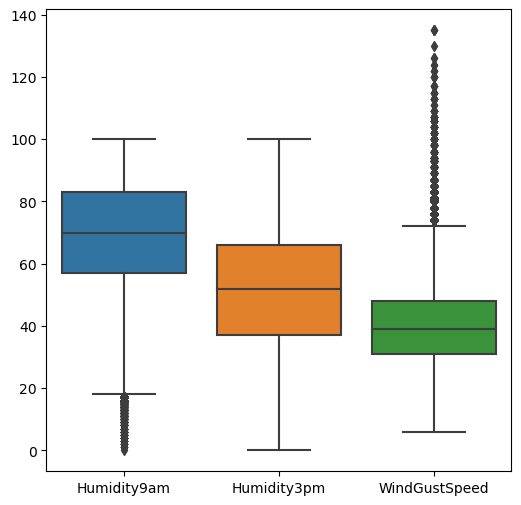

In [44]:
# recherche graphique des outliers par les boxplots de chaque variable quantitative
plt.figure(figsize = (6,6))
sns.boxplot(data = df[['Humidity9am','Humidity3pm','WindGustSpeed']]);

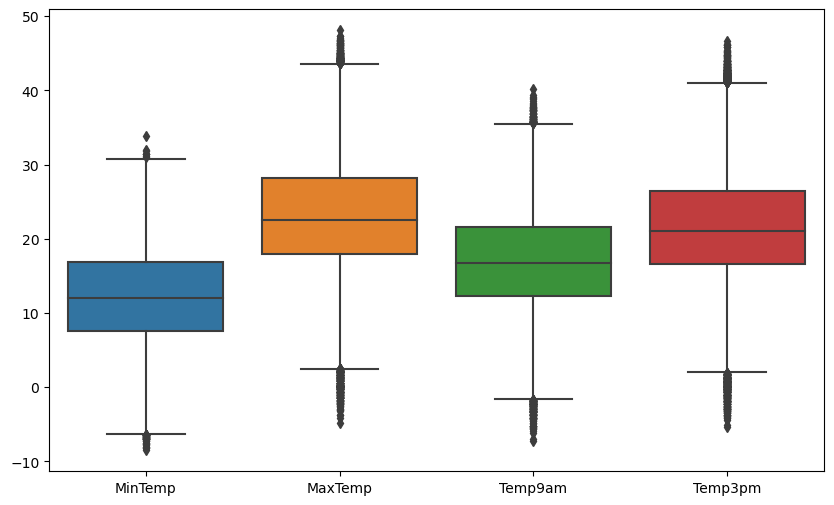

In [45]:
# recherche graphique des outliers par les boxplots de chaque variable quantitative
plt.figure(figsize = (10, 6))
sns.boxplot(data = df[['MinTemp','MaxTemp','Temp9am','Temp3pm']]);

- Les boxplots représentant les variables de température montrent des plages de valeurs raisonnables (comprises entre -10°C et 50°C)  

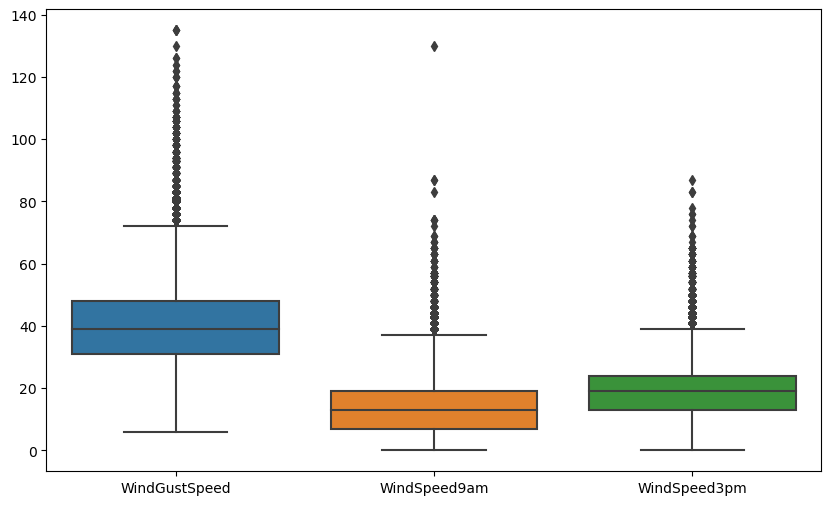

In [46]:
# recherche graphique des outliers par les boxplots de chaque variable quantitative
plt.figure(figsize = (10, 6))
sns.boxplot(data = df[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']]);

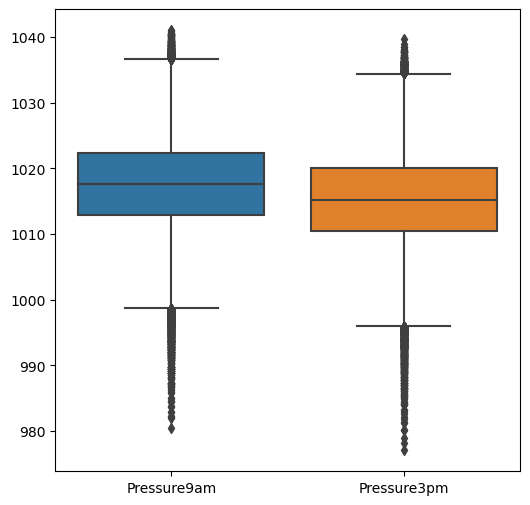

In [47]:
# recherche graphique des outliers par les boxplots de chaque variable quantitative
plt.figure(figsize = (6, 6))
sns.boxplot(data = df[['Pressure9am','Pressure3pm']]);

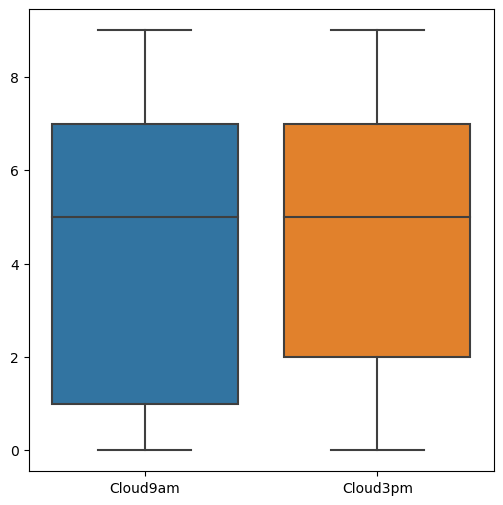

In [48]:
# recherche graphique des outliers par les boxplots de chaque variable quantitative
plt.figure(figsize = (6, 6))
sns.boxplot(data = df[['Cloud9am','Cloud3pm']]);

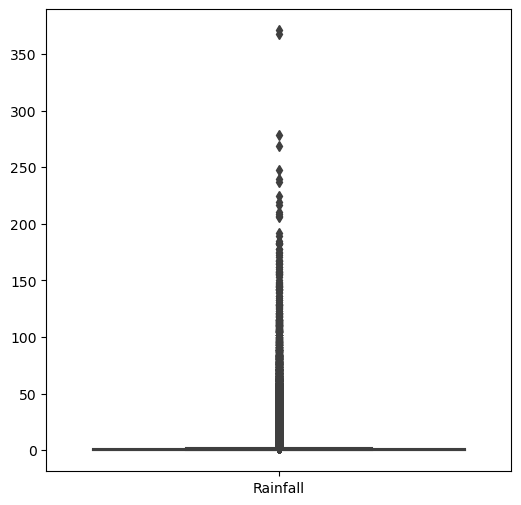

In [49]:
# recherche graphique des outliers par les boxplots de chaque variable quantitative
plt.figure(figsize = (6, 6))
sns.boxplot(data = df[['Rainfall']]);

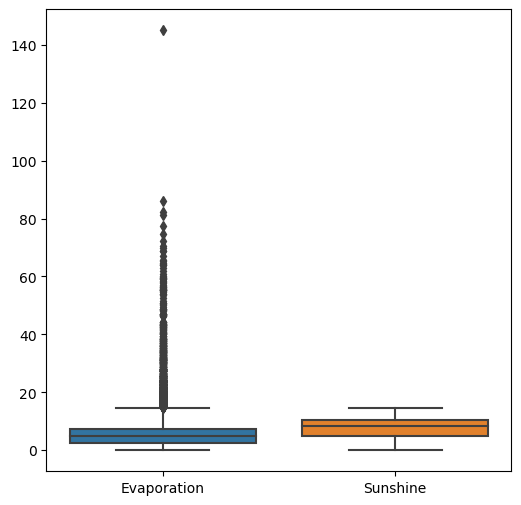

In [50]:
# recherche graphique des outliers par les boxplots de chaque variable quantitative
plt.figure(figsize = (6, 6))
sns.boxplot(data = df[['Evaporation','Sunshine']]);

In [51]:
# définition des variables avec outliers
features_with_outliers = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', \
                          'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Rainfall', 'Evaporation']

# calcul des valeurs délimitant les outliers et remplacement des outliers par la valeur des limites 
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature] < lower_limit, feature] = lower_limit
    df.loc[df[feature] > upper_limit, feature] = upper_limit

Comme nous n'avons plus d'outliers dans les données numériques, nous pouvons désormais remplacer les valeurs manquantes en utilisant la moyenne.

In [52]:
for feat in [feature for feature in num_features if df[feature].isnull().sum()]:
    df[feat].fillna(df[feat].mean(),inplace=True)

In [53]:
# vérification des valeurs manquantes sur tout le DataFrame
df.isnull().sum().sum()

0

## Matrice de corrélation

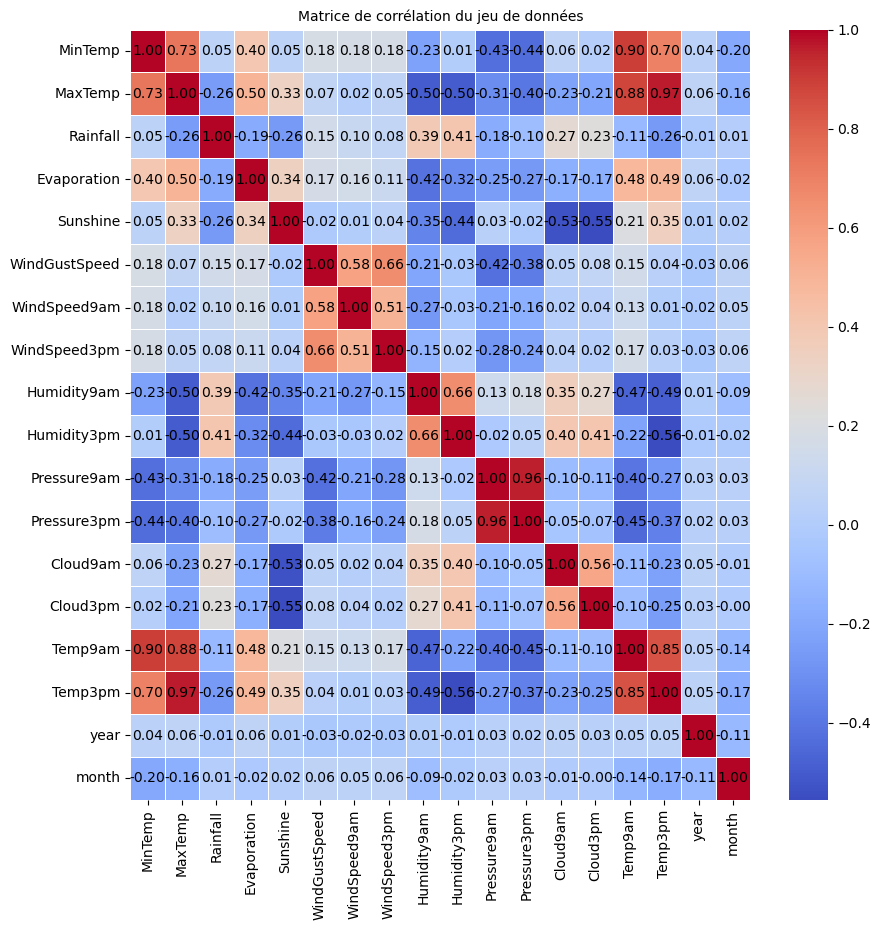

In [54]:
# matrice de corrélation
fig, ax = plt.subplots(figsize=(10,10))
annot_kws = {'fontsize':10, 'color':"k", 'verticalalignment':'center'}
sns.heatmap(df.corr(), linewidths=0.5, annot=True, annot_kws=annot_kws, fmt=".2f", ax=ax, cmap='coolwarm')
plt.title('Matrice de corrélation du jeu de données', fontsize=10);

- Les variables **'MinTemp'** et **'MaxTemp'** sont fortement positivement corrélées (coefficient de corrélation = **0.73**)
- Les variables **'MinTemp'** et **'Temp9am'** sont fortement positivement corrélées (coefficient de corrélation = **0.90**)
- Les variables **'MinTemp'** et **'Temp3pm'** sont fortement positivement corrélées (coefficient de corrélation = **0.70**)
- Les variables **'MaxTemp'** et **'Temp9am'** sont fortement positivement corrélées (coefficient de corrélation = **0.88**)
- Les variables **'MaxTemp'** et **'Temp3pm'** sont fortement positivement corrélées (coefficient de corrélation = **0.97**)
- Les variables **'WindGustSpeed'** et **'WindSpeed3pm'** sont fortement positivement corrélées (coefficient de corrélation = **0.66**)
- Les variables **'Pressure9am'** et **'Pressure3pm'** sont fortement positivement corrélées (coefficient de corrélation = **0.96**)
- Les variables **'Temp9am'** et **'Temp3pm'** sont fortement positivement corrélées (coefficient de corrélation = **0.85**)
- Les variables **'Cloud9am'** ou **'Cloud3pm'** et **'Sunshine'** sont fortement negativement corrélées (coefficient de corrélation = **-0.70**)

## Encodage des variables qualitatives

In [55]:
# informations sur les valeurs qualitatives
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          145460 non-null  object
 1   Location      145460 non-null  object
 2   WindGustDir   135134 non-null  object
 3   WindDir9am    134894 non-null  object
 4   WindDir3pm    141232 non-null  object
 5   RainToday     142199 non-null  object
 6   RainTomorrow  142193 non-null  object
dtypes: object(7)
memory usage: 7.8+ MB


In [56]:
# cardinalité des variables qualitatives 
for feature in cat_features:
    print("Cardinalité de '{}': {}".format(feature, len(df[feature].unique())))

Cardinalité de 'Location': 49
Cardinalité de 'WindGustDir': 16
Cardinalité de 'WindDir9am': 16
Cardinalité de 'WindDir3pm': 16
Cardinalité de 'RainToday': 2
Cardinalité de 'RainTomorrow': 2


### Encodage des variables qualitatives binaires

In [57]:
# encodage des variables qualitatives binaires
df['RainToday'].replace({'No':0, 'Yes':1}, inplace=True)
df['RainTomorrow'].replace({'No':0, 'Yes':1}, inplace=True)

df['RainToday'] = df['RainToday'].astype('int64')
df['RainTomorrow'] = df['RainTomorrow'].astype('int64')

### Dichotomisation (One Hot Encoding)

In [58]:
# définition de la fonction d'encodage
def one_hot_encode(df, cat, prefix):
    for col, pref in zip(cat, prefix):
        dummy = pd.get_dummies(df[col], prefix=pref)
        df = pd.concat([df, dummy], axis=1)
        df = df.drop(col, axis=1)
    return df

In [59]:
# encodage du reste des variables qualitatives
onehot_features = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
df = one_hot_encode(df, onehot_features, ['wgd', 'wd9', 'wd3'])

### Matrice de corrélation après encodage des variables

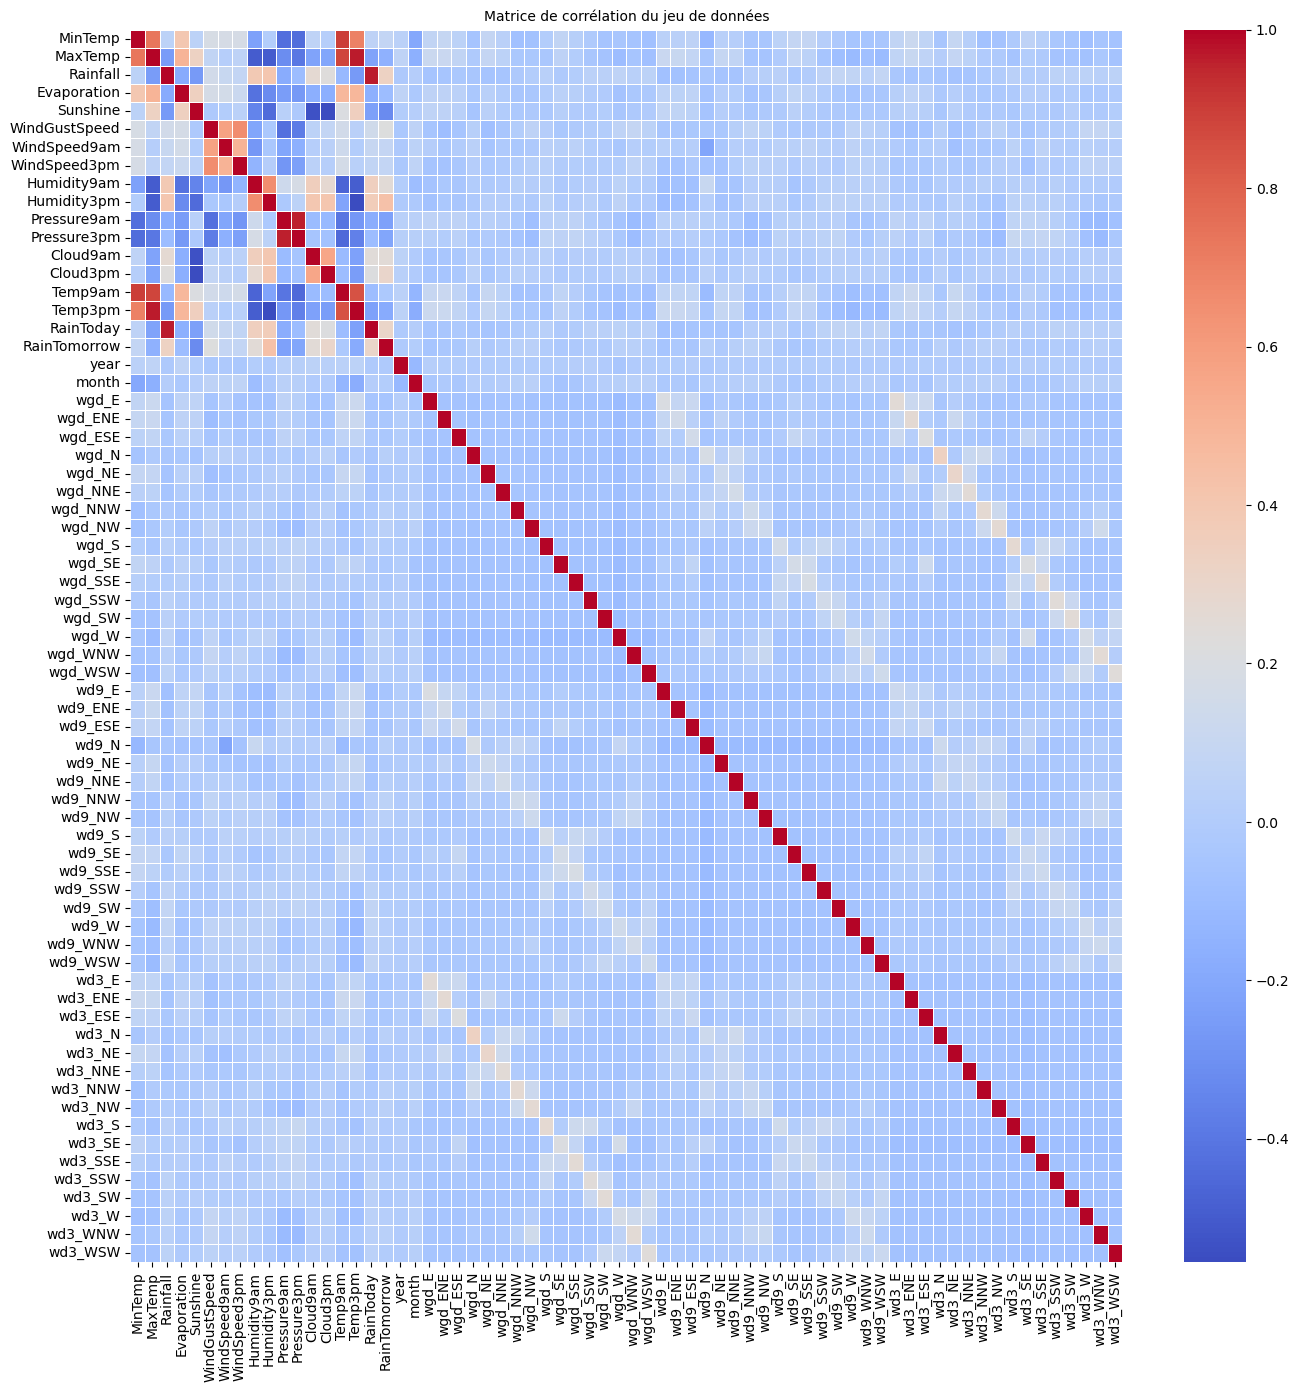

In [60]:
# matrice de corrélation après encodage des variables qualitatives
fig, ax = plt.subplots(figsize=(16,16))
annot_kws = {'fontsize':10, 'color':"k", 'verticalalignment':'center'}
sns.heatmap(df.corr(), linewidths=0.5, annot=False, annot_kws=annot_kws, fmt=".2f", ax=ax, cmap='coolwarm')
plt.title('Matrice de corrélation du jeu de données', fontsize=10);

## Séparation du jeu de données en une matrice de données et d'un vecteur cible

In [61]:
# séparation du jeu de données
y = df['RainTomorrow']
X = df.drop(['RainTomorrow', 'Location'], axis=1)

In [62]:
# affichage des colonnes de la matrice de données
X.columns.to_list()

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'year',
 'month',
 'wgd_E',
 'wgd_ENE',
 'wgd_ESE',
 'wgd_N',
 'wgd_NE',
 'wgd_NNE',
 'wgd_NNW',
 'wgd_NW',
 'wgd_S',
 'wgd_SE',
 'wgd_SSE',
 'wgd_SSW',
 'wgd_SW',
 'wgd_W',
 'wgd_WNW',
 'wgd_WSW',
 'wd9_E',
 'wd9_ENE',
 'wd9_ESE',
 'wd9_N',
 'wd9_NE',
 'wd9_NNE',
 'wd9_NNW',
 'wd9_NW',
 'wd9_S',
 'wd9_SE',
 'wd9_SSE',
 'wd9_SSW',
 'wd9_SW',
 'wd9_W',
 'wd9_WNW',
 'wd9_WSW',
 'wd3_E',
 'wd3_ENE',
 'wd3_ESE',
 'wd3_N',
 'wd3_NE',
 'wd3_NNE',
 'wd3_NNW',
 'wd3_NW',
 'wd3_S',
 'wd3_SE',
 'wd3_SSE',
 'wd3_SSW',
 'wd3_SW',
 'wd3_W',
 'wd3_WNW',
 'wd3_WSW']

## Importance des variables

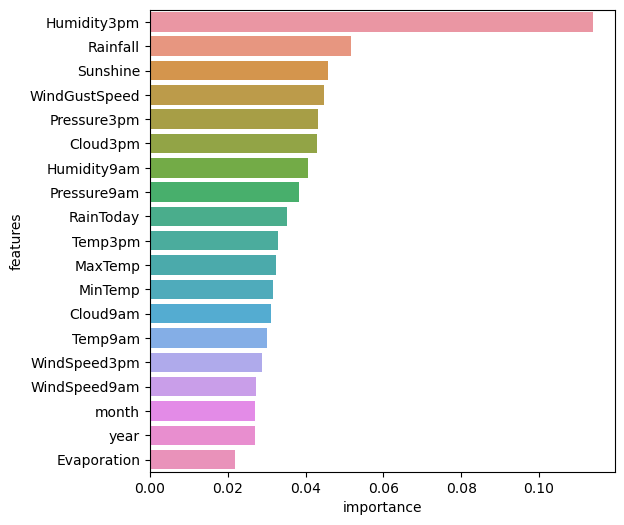

In [63]:
# création d'un estimateur Random Forest
etc = ExtraTreesClassifier(n_estimators=50, random_state=123)

# entrainement de l'estimateur sur la matrice d'entrée et le vecteur cible
etc.fit(X, y)

# importance de chaque caractéristique
importances = etc.feature_importances_

# création de la courbe
plot_data = pd.DataFrame({'features':pd.Series(X.columns), 'importance':pd.Series(importances)})

plt.figure(figsize=(6,6))
plot_data = plot_data.sort_values('importance', ascending=False)
plot_data = plot_data[plot_data['importance'] > 0.01]
ax = sns.barplot(x=plot_data['importance'], y=plot_data['features'])

In [64]:
plot_data['features'].to_list()

['Humidity3pm',
 'Rainfall',
 'Sunshine',
 'WindGustSpeed',
 'Pressure3pm',
 'Cloud3pm',
 'Humidity9am',
 'Pressure9am',
 'RainToday',
 'Temp3pm',
 'MaxTemp',
 'MinTemp',
 'Cloud9am',
 'Temp9am',
 'WindSpeed3pm',
 'WindSpeed9am',
 'month',
 'year',
 'Evaporation']

### Matrice de corrélation affinée par importance des variables

In [65]:
# création d'un sous-ensemble du jeu de données par importance des variables
df_subset = df[plot_data['features'].to_list()]

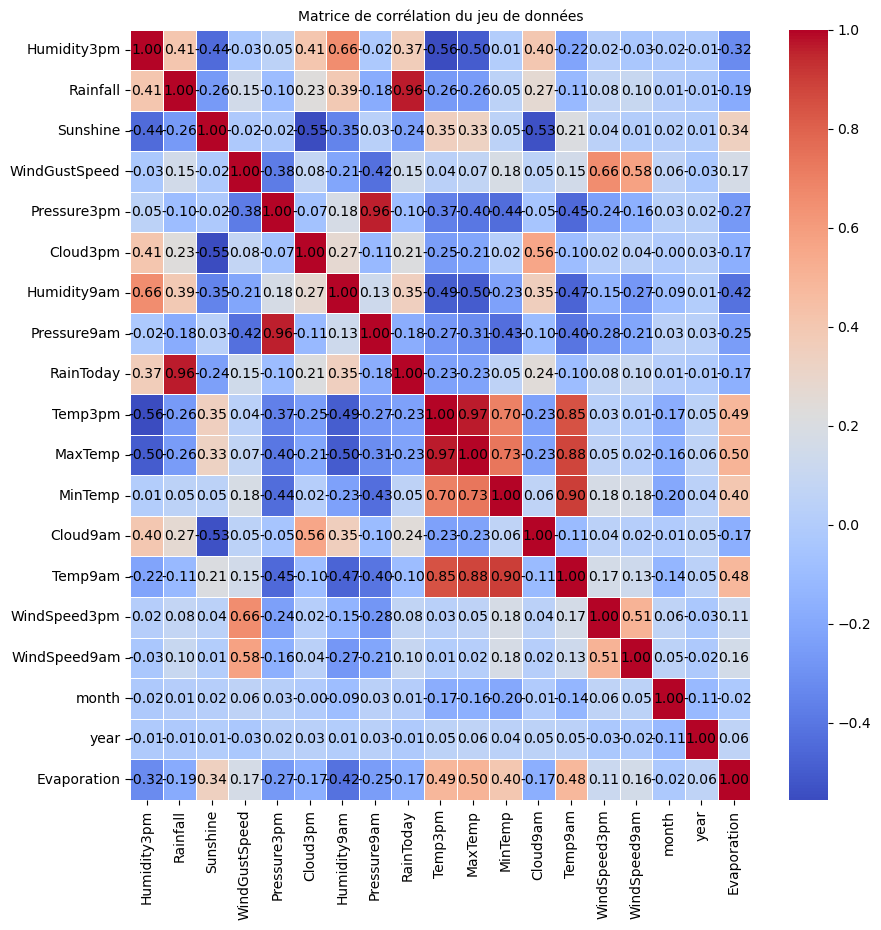

In [66]:
# matrice de corrélation affinée par importance des variables 
fig, ax = plt.subplots(figsize=(10,10))
annot_kws={'fontsize':10, 'color':"k", 'verticalalignment':'center'}
sns.heatmap(df_subset.corr(), linewidths=0.5, annot=True, annot_kws=annot_kws, fmt=".2f", ax=ax, cmap = 'coolwarm')
plt.title('Matrice de corrélation du jeu de données', fontsize=10);

## Equilibrage du jeu de données

In [67]:
# undersampling des données
rUs = RandomUnderSampler()
X_ru, y_ru = rUs.fit_resample(X, y)
print("Classes échantillon undersampled :", dict(pd.Series(y_ru).value_counts()))

Classes échantillon undersampled : {0: 31877, 1: 31877}


## Standardisation des données

In [68]:
# standardisation des données issues de l'undersampling
sc = StandardScaler()
X_ru = sc.fit_transform(X_ru)

# **Visualisations**

## Moyenne annuelle des précipitations

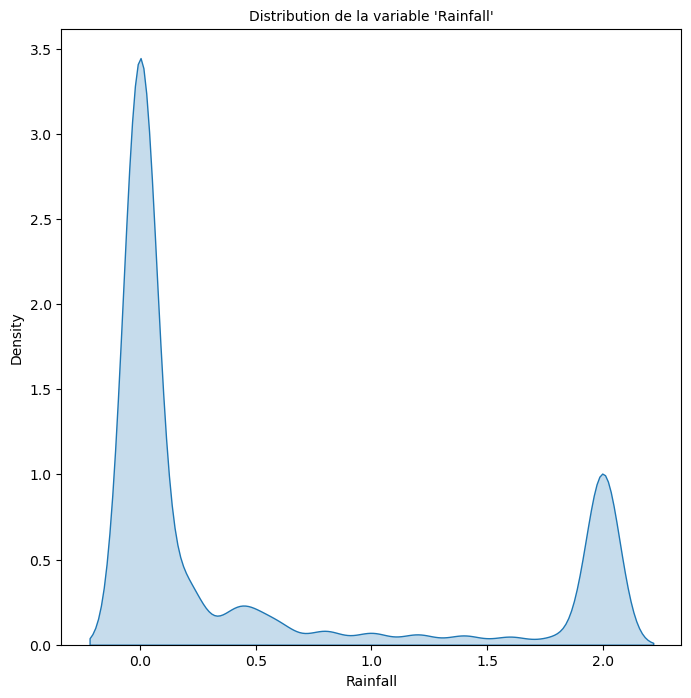

In [69]:
# distribution de la variable "Rainfall"
plt.figure(figsize=(8,8))
sns.kdeplot(df['Rainfall'], shade='True')
plt.title("Distribution de la variable 'Rainfall'", fontsize=10);

- la distribution de la variable "Rainfall" est fortement concentrée autour des valeurs 0 mm et 2 mm. 

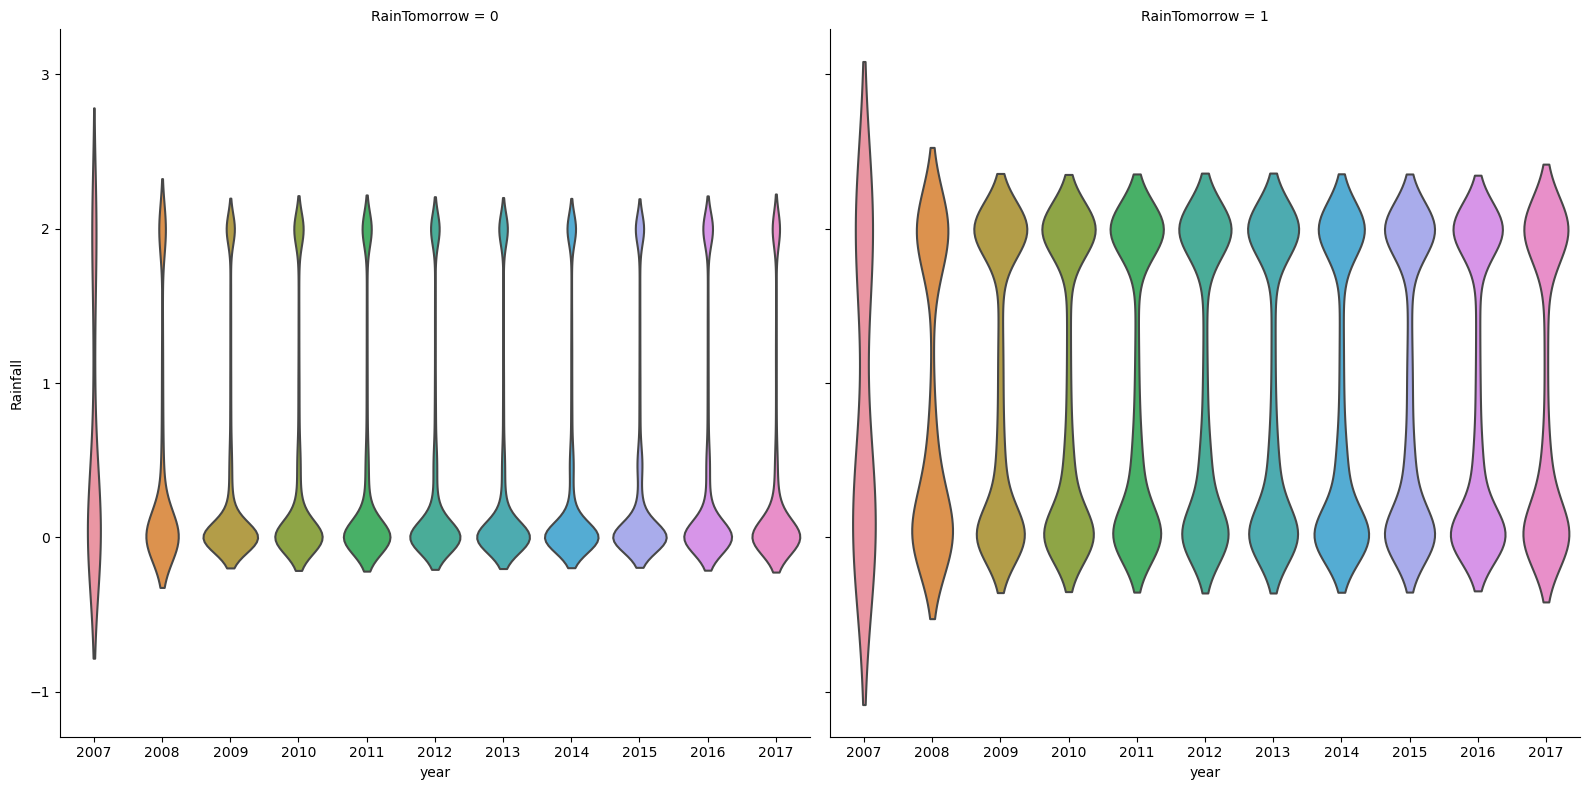

In [70]:
# distribution de la variable "Rainfall" avec les courbes de densité pour chaque modalité de la variable "RainTomorrow" 
# et pour chaque année de la période observée.
sns.catplot(x='year', y='Rainfall', kind='violin', split=True, inner=None, height=8, col='RainTomorrow', data=df);

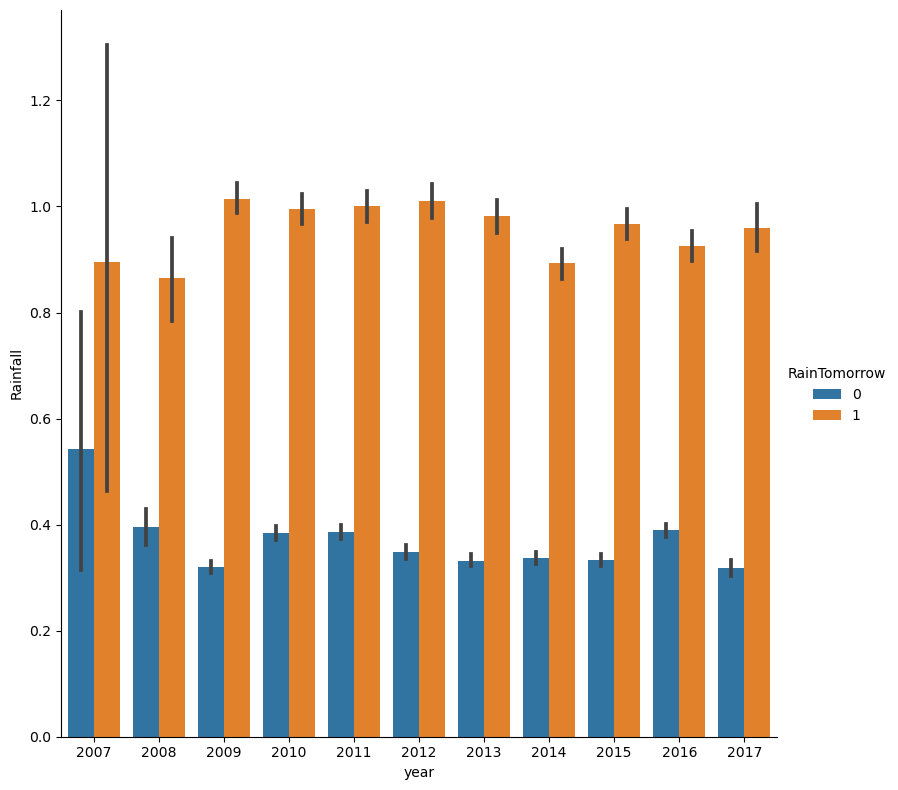

In [71]:
# graphique en barres de la variable "Rainfall" selon les modalités de la variable "RainTomorrow"
sns.catplot(x='year', y='Rainfall', kind='bar', height=8, hue='RainTomorrow', data=df);

In [72]:
# séparation des données selon les classes de la variable cible "RainTomorrow"
rt_yes = df[df['RainTomorrow'] == 1]
rt_no = df[df['RainTomorrow'] == 0]

In [73]:
# nombre d'observations selon les modalités de la variable "RainTomorrow"
print("Nombre d'observations pour 'RainTomorrow' = 'Yes' : {} \n \
Nombre d'observations pour 'RainTomorrow' = 'No' : {}".format(rt_yes.shape[0], rt_no.shape[0]))

Nombre d'observations pour 'RainTomorrow' = 'Yes' : 31877 
 Nombre d'observations pour 'RainTomorrow' = 'No' : 113422


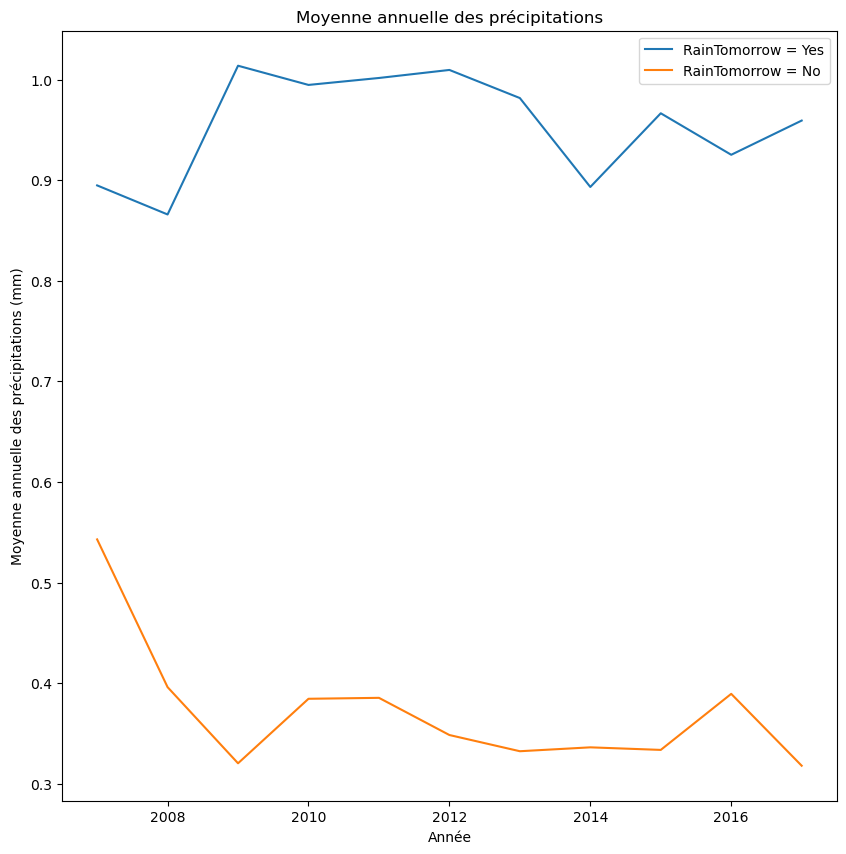

In [74]:
# représentation de la moyenne annuelle des précipitations selon les valeurs de la variable cible
rt_yes_rainfall = rt_yes.groupby('year')['Rainfall'].mean()
rt_no_rainfall = rt_no.groupby('year')['Rainfall'].mean()

plt.figure(figsize=(10,10))
sns.lineplot(x=rt_yes_rainfall.index, y=rt_yes_rainfall, label="RainTomorrow = Yes")
sns.lineplot(x=rt_no_rainfall.index, y=rt_no_rainfall, label="RainTomorrow = No")
plt.title("Moyenne annuelle des précipitations")
plt.xlabel("Année")
plt.ylabel("Moyenne annuelle des précipitations (mm)")
plt.legend();

In [75]:
# moyenne minimale des précipitations lorsque "RainTomorrow" est égale à "Yes"
rt_yes_rainfall.min()

0.8658469691875098

In [76]:
# moyenne maximale des précipitations lorsque "RainTomorrow" est égale à "No"
rt_no_rainfall.max()

0.5428571428571429

- lorsque "RainTomorrow" est égale à "Yes", la moyenne annuelle des précipitations est supérieure à 0.8 mm.
- lorsque "RainTomorrow" est égale à "No", la moyenne annuelle des précipitations est inférieure à 0.6 mm.

In [77]:
# villes avec les plus fortes précipitations
print("Précipitation maximale: {} mm".format(df['Rainfall'].max()))

df.groupby('Location', sort=False)['Rainfall'].max().nlargest()

Précipitation maximale: 2.0 mm


Location
Albury           2.0
BadgerysCreek    2.0
Cobar            2.0
CoffsHarbour     2.0
Moree            2.0
Name: Rainfall, dtype: float64

In [78]:
# sauvegarde locale et temporaire du jeu de données
df_backup = df

## Influence pour la prévision de pluie

In [79]:
weather = pd.read_csv('../data/weatherAUS.csv')

In [80]:
weather.dropna(subset=['RainTomorrow'], inplace=True)
weather.reset_index(inplace=True)
weather.drop(columns=['index'], inplace=True)

In [81]:
yes_no_dict = {'Yes':1, 'No':0}
weather['RainToday_Num'] = weather['RainToday'].map(yes_no_dict)
weather['RainTomorrow_Num'] = weather['RainTomorrow'].map(yes_no_dict)

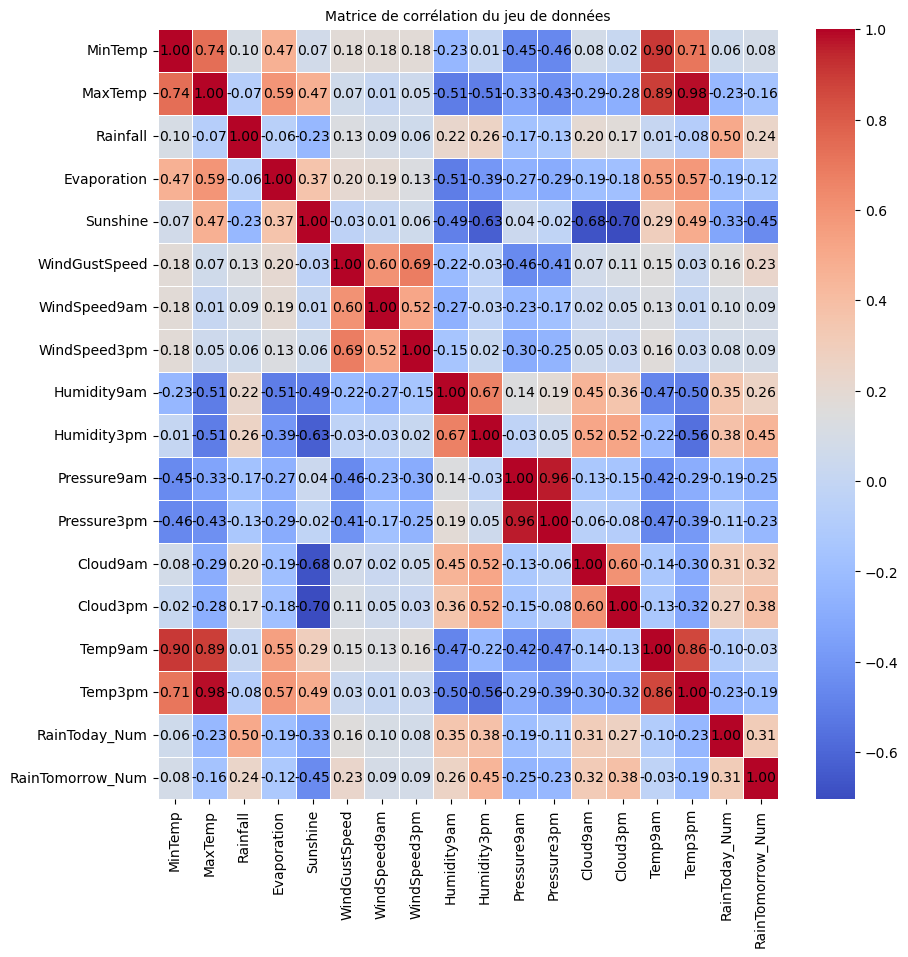

In [82]:
fig, ax = plt.subplots(figsize=(10,10))
annot_kws={'fontsize':10, 'color':"k", 'verticalalignment':'center'}
sns.heatmap(weather.corr(), linewidths=0.5, annot=True, annot_kws=annot_kws, fmt=".2f", ax=ax, cmap = 'coolwarm')
plt.title('Matrice de corrélation du jeu de données', fontsize=10);

- Sans surprise, les différents indicateurs sont corrélés avec l'heure des relevés. Nous pourrons garder un indicateur sur les deux lors de la construction du modèle.

In [83]:
weather.corr()['RainTomorrow_Num'].sort_values(ascending=False).head(5)

RainTomorrow_Num    1.000000
Humidity3pm         0.446160
Cloud3pm            0.381870
Cloud9am            0.317380
RainToday_Num       0.313097
Name: RainTomorrow_Num, dtype: float64

- L'humidité, l'ennuagement et le fait qu'il pleuve aujourd'hui sont les facteurs les plus influents sur la prévision de pluie

## Influence de la pluie des jours précédents sur la pluie du lendemain

In [84]:
pd.crosstab(weather['RainToday_Num'], weather['RainTomorrow_Num'], normalize='index')

RainTomorrow_Num,0,1
RainToday_Num,,
0.0,0.848132,0.151868
1.0,0.535940,0.464060


- si il pleut aujourd'hui alors dans 46% des cas il pleuvra demain

## Influence de certains critères (indépendamment du climat)

In [85]:
weather['Date'] = pd.to_datetime(weather['Date'])
weather['Month'] = weather['Date'].dt.month
weather['Week'] = weather['Date'].dt.isocalendar().week

In [86]:
weather['Temp_Delta_MinMax'] = weather['MaxTemp'] - weather['MinTemp']
weather['Humidity_Delta'] = weather['Humidity3pm'] - weather['Humidity9am']
weather['Pressure_Delta'] = weather['Pressure3pm'] - weather['Pressure9am']
weather['Clouds_Delta'] = weather['Cloud3pm'] - weather['Cloud9am']

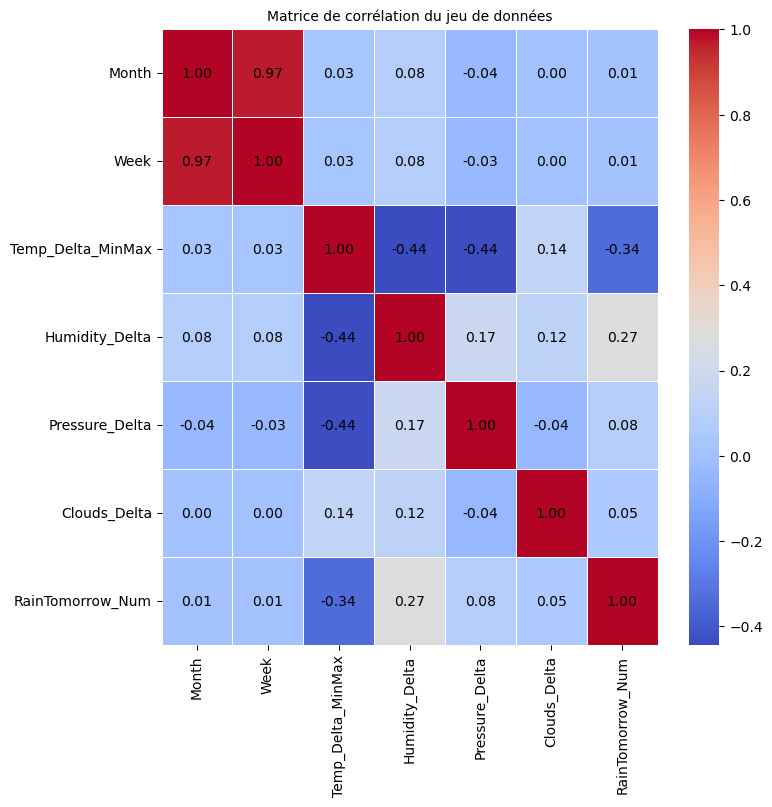

In [87]:
# matrice de corrélation affinée par importance des variables 
fig, ax = plt.subplots(figsize=(8,8))
annot_kws={'fontsize':10, 'color':"k", 'verticalalignment':'center'}
sns.heatmap(weather[['Month', 'Week', 'Temp_Delta_MinMax', 'Humidity_Delta', 'Pressure_Delta', 
                     'Clouds_Delta', 'RainTomorrow_Num']].corr(), 
            linewidths=0.5, annot=True, annot_kws=annot_kws, fmt=".2f", ax=ax, cmap = 'coolwarm')
plt.title('Matrice de corrélation du jeu de données', fontsize=10);

- Le mois ou la semaine ne sont pas corrélés avec la prévision de pluie
- Les différences de température et d'humidité sur une journée sont légèrement corrélés avec la pluie du lendemain ==> Indicateurs à utiliser dans le modèle.

## Influence des vents sur la pluie

In [88]:
df = pd.read_csv('../data/weatherAUS.csv')

In [89]:
df[df['RainTomorrow'] == 'Yes'].head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
10,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,Yes
11,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
12,2008-12-13,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
16,2008-12-17,Albury,14.1,20.9,0.0,NaN,NaN,ENE,22.0,SSW,...,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes


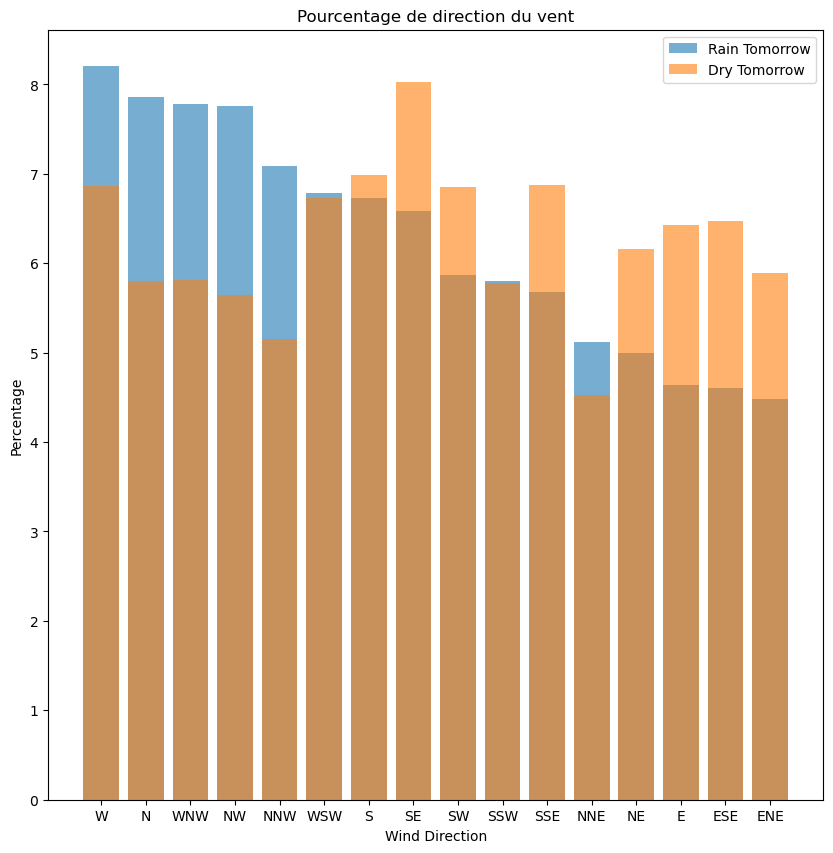

In [90]:
plt.figure(figsize=(10,10))
Yes_wind =  df[df['RainTomorrow'] == 'Yes'].WindDir3pm.value_counts(normalize = True,sort=True)*100
No_wind = df[df['RainTomorrow'] == 'No'].WindDir3pm.value_counts(normalize = True,sort=False)*100
plt.bar(Yes_wind.index, Yes_wind.values, alpha=0.6, label = 'Rain Tomorrow')
plt.bar(No_wind.index, No_wind.values, alpha = 0.6, label = 'Dry Tomorrow')
plt.legend()
plt.xlabel('Wind Direction')
plt.ylabel("Percentage")
plt.title("Pourcentage de direction du vent")
plt.show()

Nous avons normalisé les résultats pour faciliter la comparaison entre les deux cas (RainTomorrow = oui/non). En faisant un 'sort' pour un des cas, il semble qu'il y ait plus de chance d'avoir de la pluie le lendemain si le vent a une direction W ou N et moins de chance si le vent a une direction E ou S.

On analyse ce scenario.

In [91]:
cont_tab = pd.crosstab(df.WindDir3pm, df.RainTomorrow)

In [92]:
# test de chi2 (test de proportions)
resultats_vent = chi2_contingency(cont_tab)

statistique = resultats_vent[0]
p_value = resultats_vent[1]
degre_liberte = resultats_vent[2]

print("Test de chi2 entre les variables 'WindDir3pm' et 'RainTomorrow':")
print("\n statistique: {} \n p_value: {} \n degre_liberte: {}".format(statistique, p_value, degre_liberte))

Test de chi2 entre les variables 'WindDir3pm' et 'RainTomorrow':

 statistique: 1281.2667035163702 
 p_value: 5.645749267196633e-264 
 degre_liberte: 15


In [93]:
# mesure du niveau de corrélation entre deux variables qualitatives par le V de Cramer
def V_Cramer(cont_tab, n_obs):
    chi2 = chi2_contingency(cont_tab)[0]
    k = cont_tab.shape[0]
    r = cont_tab.shape[1]
    k_tilde = k-(k-1)**2/(n_obs -1)
    r_tilde = r - (r-1)**2/(n_obs-1)
    phi2 = max(0,chi2/n_obs - (k-1)*(r-1)/(n_obs-1))
    V= np.sqrt(phi2/min(k_tilde-1,r_tilde-1))
    return V


V=V_Cramer(table, df.shape[0])

print ('V_Cramer = {}'.format(V))


V_Cramer = 0.3079961727173337


Le p value est inférieure à 5% donc nous pouvons rejeter l'hypothèse que "WindDir3pm" et "RainTomorrow" sont indépendantes. Par contre le V de Cramer n'est pas très élevé donc il n'y a pas une forte corrélation mais cela n'est pas non plus non négligable.

## Distribution des températures au cours de l’année suivant le climat

In [94]:
# récupération du jeu de données sauvegardé
df = df_backup

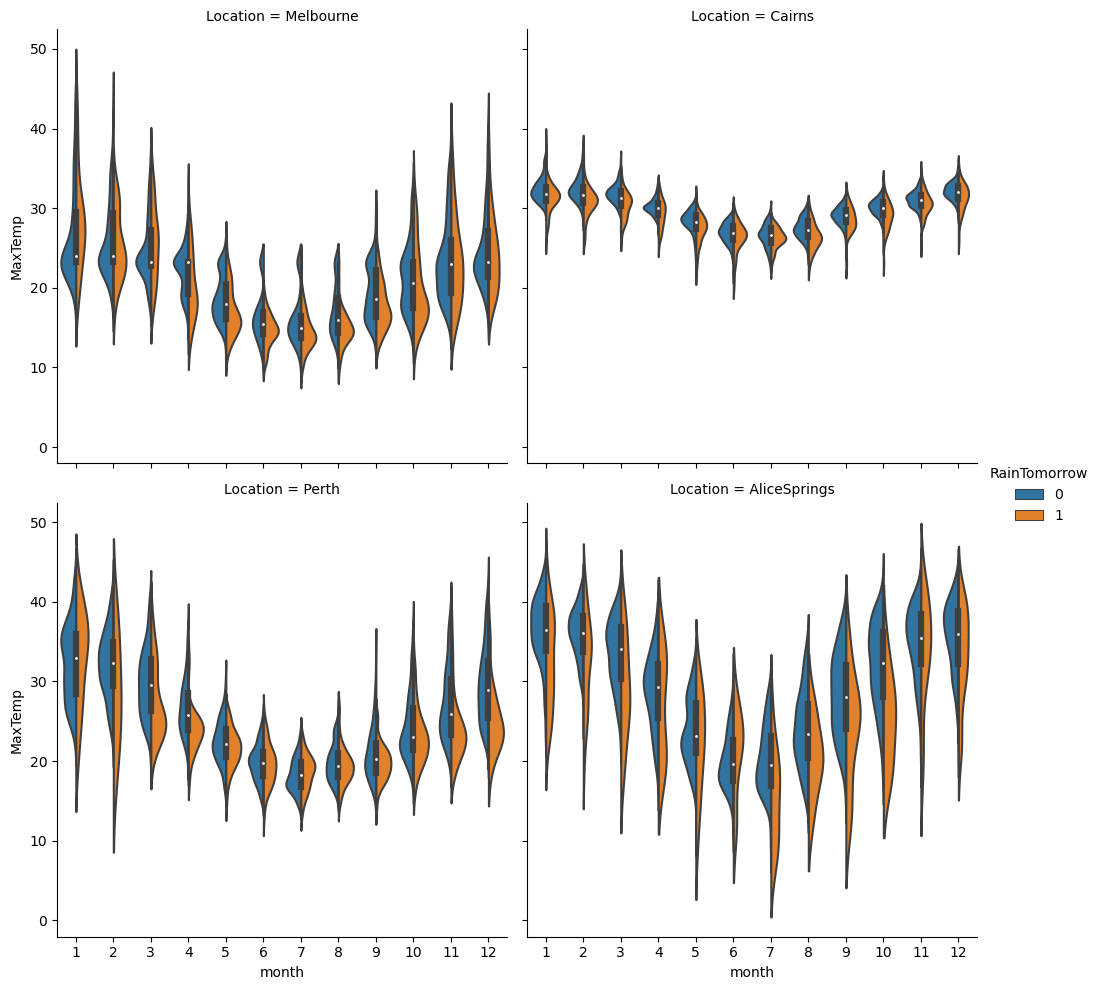

In [95]:
four_corners = ['Melbourne', 'Cairns', "AliceSprings", 'Perth']

df_four = df[df.Location.isin(four_corners)]

sns.catplot(kind='violin', x='month', y='MaxTemp', hue='RainTomorrow', 
            split=True, data=df_four, col='Location', col_wrap=2);

Nous avons choisi 4 villes différentes, très éloignées les unes des autres, avec des climats différents pour une représentation visuelle.

Une grande dépendance entre la température et "RainTomorrow" sera vue comme une asymmétrie entre les deux côtés des violons. Ce n'est pas clairement le cas partout en Australie, mais cela semble être le cas au moins à Cairns.

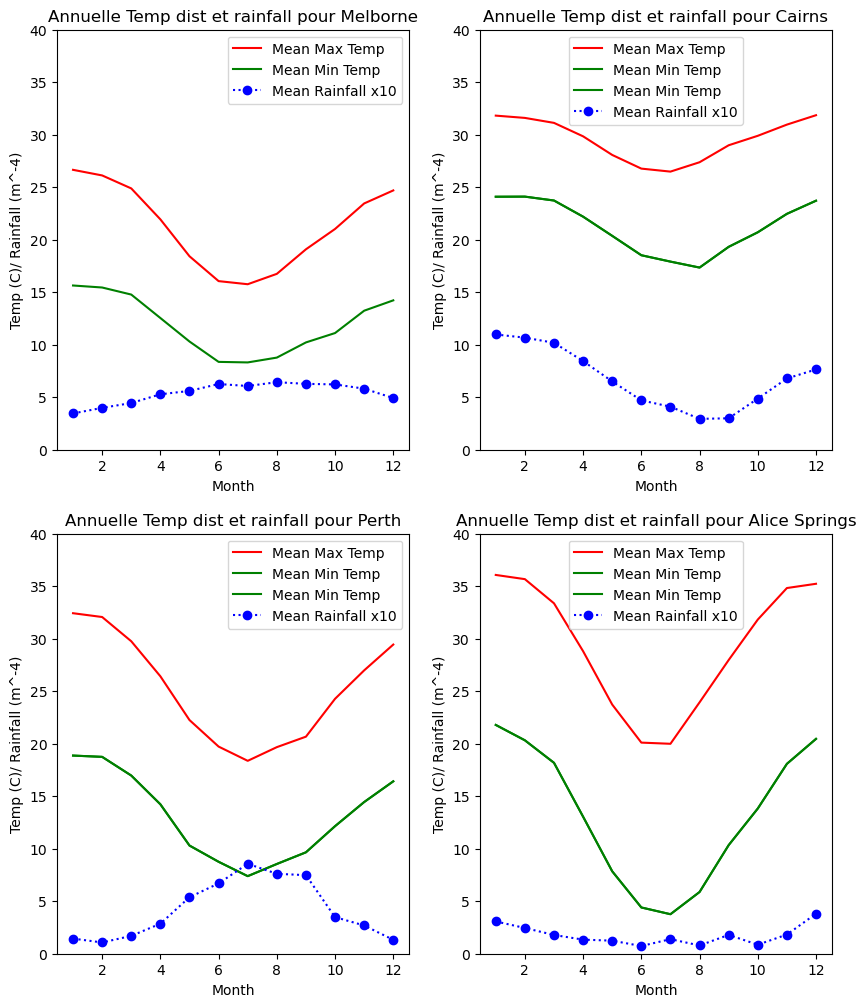

In [96]:
df_Melbourne = df[df.Location == 'Melbourne']
df_Cairns = df[df.Location == 'Cairns']
df_Alice = df[df.Location == 'AliceSprings']
df_Perth = df[df.Location == 'Perth']

Melborne = df_Melbourne.groupby(['month']).agg('mean')
Cairns = df_Cairns.groupby(['month']).agg('mean')
Alice= df_Alice.groupby(['month']).agg('mean')
Perth= df_Perth.groupby(['month']).agg('mean')

Melborne.head()
month =[1,2,3,4,5,6,7,8,9,10,11,12]

f = plt.figure(figsize=(10,12))
ax = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax4 = f.add_subplot(223)
ax3 = f.add_subplot(224)

ax.plot(month, Melborne.MaxTemp, color = 'red', label = "Mean Max Temp")
ax.plot(month, Melborne.MinTemp, color = 'green', label = "Mean Min Temp")
ax.plot(month, Melborne.Rainfall*10, 'bo:', label = "Mean Rainfall x10")
ax.set_ylabel("Temp (C)/ Rainfall (m^-4)")
ax.set_xlabel('Month')
ax.set_ylim(0,40)
ax.legend()
ax.set_title("Annuelle Temp dist et rainfall pour Melborne")

ax2.plot(month, Cairns.MaxTemp, color = 'red', label = "Mean Max Temp")
ax2.plot(month, Cairns.MinTemp, color = 'green', label = "Mean Min Temp")
ax2.plot(month, Cairns.MinTemp, color = 'green', label = "Mean Min Temp")
ax2.plot(month, Cairns.Rainfall*10, 'bo:', label = "Mean Rainfall x10")
ax2.set_ylabel("Temp (C)/ Rainfall (m^-4)")
ax2.set_xlabel('Month')
ax2.set_ylim(0,40)
ax2.legend()
ax2.set_title("Annuelle Temp dist et rainfall pour Cairns")

ax3.plot(month, Alice.MaxTemp, color = 'red', label = "Mean Max Temp")
ax3.plot(month, Alice.MinTemp, color = 'green', label = "Mean Min Temp")
ax3.plot(month, Alice.MinTemp, color = 'green', label = "Mean Min Temp")
ax3.plot(month, Alice.Rainfall*10, 'bo:', label = "Mean Rainfall x10")
ax3.set_ylabel("Temp (C)/ Rainfall (m^-4)")
ax3.set_xlabel('Month')
ax3.set_ylim(0,40)
ax3.legend()
ax3.set_title("Annuelle Temp dist et rainfall pour Alice Springs")

ax4.plot(month, Perth.MaxTemp, color = 'red', label = "Mean Max Temp")
ax4.plot(month, Perth.MinTemp, color = 'green', label = "Mean Min Temp")
ax4.plot(month, Perth.MinTemp, color = 'green', label = "Mean Min Temp")
ax4.plot(month, Perth.Rainfall*10, 'bo:', label = "Mean Rainfall x10")
ax4.set_ylabel("Temp (C)/ Rainfall (m^-4)")
ax4.set_xlabel('Month')
ax4.set_ylim(0,40)
ax4.legend()
ax4.set_title("Annuelle Temp dist et rainfall pour Perth");

Encore avec notre sélection des villes Australiennes, il est clair que la distribution des températures pendant l'année varie en amplitude.

Il est aussi intéressant de voir que le profil de "Rainfall" pour Perth est l'inverse de celui de Cairns.

## Représentation cartographique

In [97]:
# récupération du jeu de données sauvegardé
df = df_backup

In [98]:
# création d'un dataframe avec les villes australiennes et les latitudes et longitudes correspondantes
ar = np.array([['Albury',-36.0810,146.9185], ['BadgerysCreek',-33.8874,150.7405], ['Cobar',-31.4949,145.8401],
               ['CoffsHarbour',-30.29702,153.1151], ['Moree',-29.4644,149.8451], ['Newcastle',-32.9284,151.7606],
               ['NorahHead',-33.2825,151.5741], ['NorfolkIsland',-29.0408,167.9552], ['Penrith',-33.7511,150.6942],
               ['Richmond',-33.5983,150.7511], ['Sydney',-33.8650,151.2094], ['SydneyAirport',-33.9473,151.1794],
               ['WaggaWagga',-35.1171,147.3567], ['Williamtown',-32.8150,151.8427], ['Wollongong',-34.4331,150.8831],
               ['Canberra',-35.2931,149.1269], ['Tuggeranong',-35.4244,149.0888], ['MountGinini',-35.5293,148.7722],
               ['Ballarat',-37.5500,143.8500], ['Bendigo',-36.7500,144.2667], ['Sale',-38.1000,147.0667],
               ['MelbourneAirport',-37.6712,144.8511], ['Melbourne',-37.8136,144.9631], ['Mildura',-34.1889,142.1583],
               ['Nhil',-36.3327,141.6503], ['Portland',-38.3333,141.6000], ['Watsonia',-37.7113,145.0827],
               ['Dartmoor',-37.9222,141.2749], ['Brisbane',-27.4678,153.0281], ['Cairns',-16.9303,145.7703],
               ['GoldCoast',-28.0166,153.3999], ['Townsville',-19.2564,146.8183], ['Adelaide',-34.9289,138.6011],
               ['MountGambier',-37.8294,140.7827], ['Nuriootpa',-34.4667,138.9833], ['Woomera',-31.1998,136.8325],
               ['Albany',-35.0228,117.8814], ['Witchcliffe',-34.0260,115.0999], ['PearceRAAF',-31.6677,116.0090],
               ['PerthAirport',-31.9410,115.9742], ['Perth',-31.9522,115.8589], ['SalmonGums',-32.9763,121.6422],
               ['Walpole',-34.9550,116.7696], ['Hobart',-42.8806,147.3250], ['Launceston',-41.4419,147.1450],
               ['AliceSprings',-23.6974,133.8836], ['Darwin',-12.4381,130.8411], ['Katherine',-14.4667,132.2667],
               ['Uluru',-25.3444,131.0354]])

df1 = pd.DataFrame(ar, columns=['Ville', 'Latitude', 'Longitude'])
df1.Latitude = df1.Latitude.astype(float)
df1.Longitude = df1.Longitude.astype(float)

In [99]:
# fusion du dataframe précédent avec le dataframe principale df
df2 = df.groupby('Location').sum()
df_lat_long = df1.merge(df2, left_on="Ville", right_on="Location")

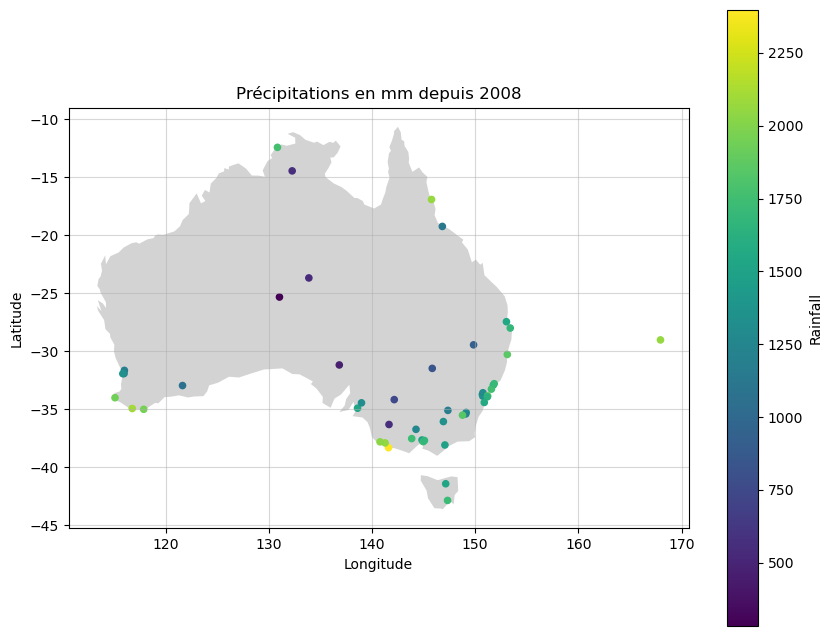

In [100]:
# cartographie des précipitations
fig,ax = plt.subplots(figsize=(10,8))
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"]=="Australia"].plot(color="lightgrey", ax=ax)

df_lat_long.plot.scatter(x='Longitude', y='Latitude', c='Rainfall', cmap='viridis',
                         title="Précipitations en mm depuis 2008",ax=ax)
ax.grid(b=True,alpha=0.5);

In [101]:
# remplacement des valeurs manquantes de "RainToday" en utilisant le mode
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)

In [102]:
# encodage de la variable qualitative "RainToday"
df['RainToday'].replace({'No':0, 'Yes':1}, inplace=True)
df['RainToday'] = df['RainToday'].astype('int64')

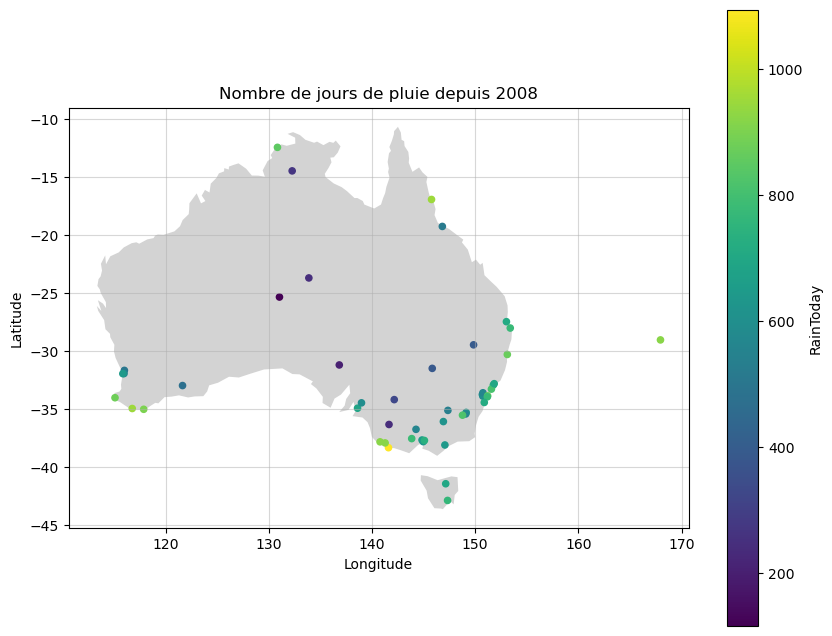

In [103]:
# cartographie des précipitations par rapport à la variable "RainToday"
fig, ax = plt.subplots(figsize=(10,8))
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"]=="Australia"].plot(color="lightgrey", ax=ax)

df_lat_long.plot.scatter(x='Longitude', y='Latitude', c='RainToday', cmap='viridis',
                         title="Nombre de jours de pluie depuis 2008", ax=ax)
ax.grid(b=True,alpha=0.5);